In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

LOGISTIC REGRESSION
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the St-cloud/deploy-your-app 
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



In [2]:
#target column is 'survived' .which indicates wheather a passenger survived or not (1 for survived and 0 for not survived)
titanic_train_data=pd.read_csv(r"C:\Users\durwa\Downloads\titanic train data.csv")
titanic_train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
titanic_test_data=pd.read_csv(r"C:\Users\durwa\Downloads\titanic test data.csv")
titanic_test_data

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [4]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#ssome columns are not useful for prediction so we deleted that columns.
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic_train_data.drop(columns=columns_to_drop, inplace=True)
titanic_test_data.drop(columns=columns_to_drop, inplace=True)

In [6]:
#1. Data Exploration:
#a. Load the dataset and perform exploratory data analysis (EDA).
#b. Examine the features, their types, and summary statistics.
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.
titanic_train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [7]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
#2. Data Preprocessing:handling missing value
titanic_train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
titanic_test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [10]:
len(titanic_train_data)

891

In [11]:
len(titanic_test_data)

418

In [12]:
#Calculate the percentage of missig values in each column.
for i in titanic_train_data.isnull().sum():
    print((i/len(titanic_train_data))*100,'%')

0.0 %
0.0 %
0.0 %
19.865319865319865 %
0.0 %
0.0 %
0.0 %
0.22446689113355783 %


In [13]:
for i in titanic_test_data.isnull().sum():
    print((i/len(titanic_test_data))*100,'%')

0.0 %
0.0 %
20.574162679425836 %
0.0 %
0.0 %
0.23923444976076555 %
0.0 %


In [14]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [15]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [16]:
Embarked_mode=titanic_train_data['Embarked'].mode()[0]
Embarked_mode

'S'

In [17]:
Age_median = titanic_train_data['Age'].median()
Age_median

28.0

In [18]:
Age_median = titanic_test_data['Age'].median()
Age_median

27.0

In [19]:
Fare_median = titanic_test_data['Fare'].median()
Fare_median

14.4542

In [20]:
titanic_train_data['Age'].fillna(Age_median, inplace=True)

In [21]:
titanic_test_data['Age'].fillna(Age_median, inplace=True)

In [22]:
titanic_test_data['Fare'].fillna(Fare_median, inplace=True)

In [23]:
titanic_train_data['Embarked'].fillna(Embarked_mode, inplace=True)

In [24]:
titanic_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
titanic_test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

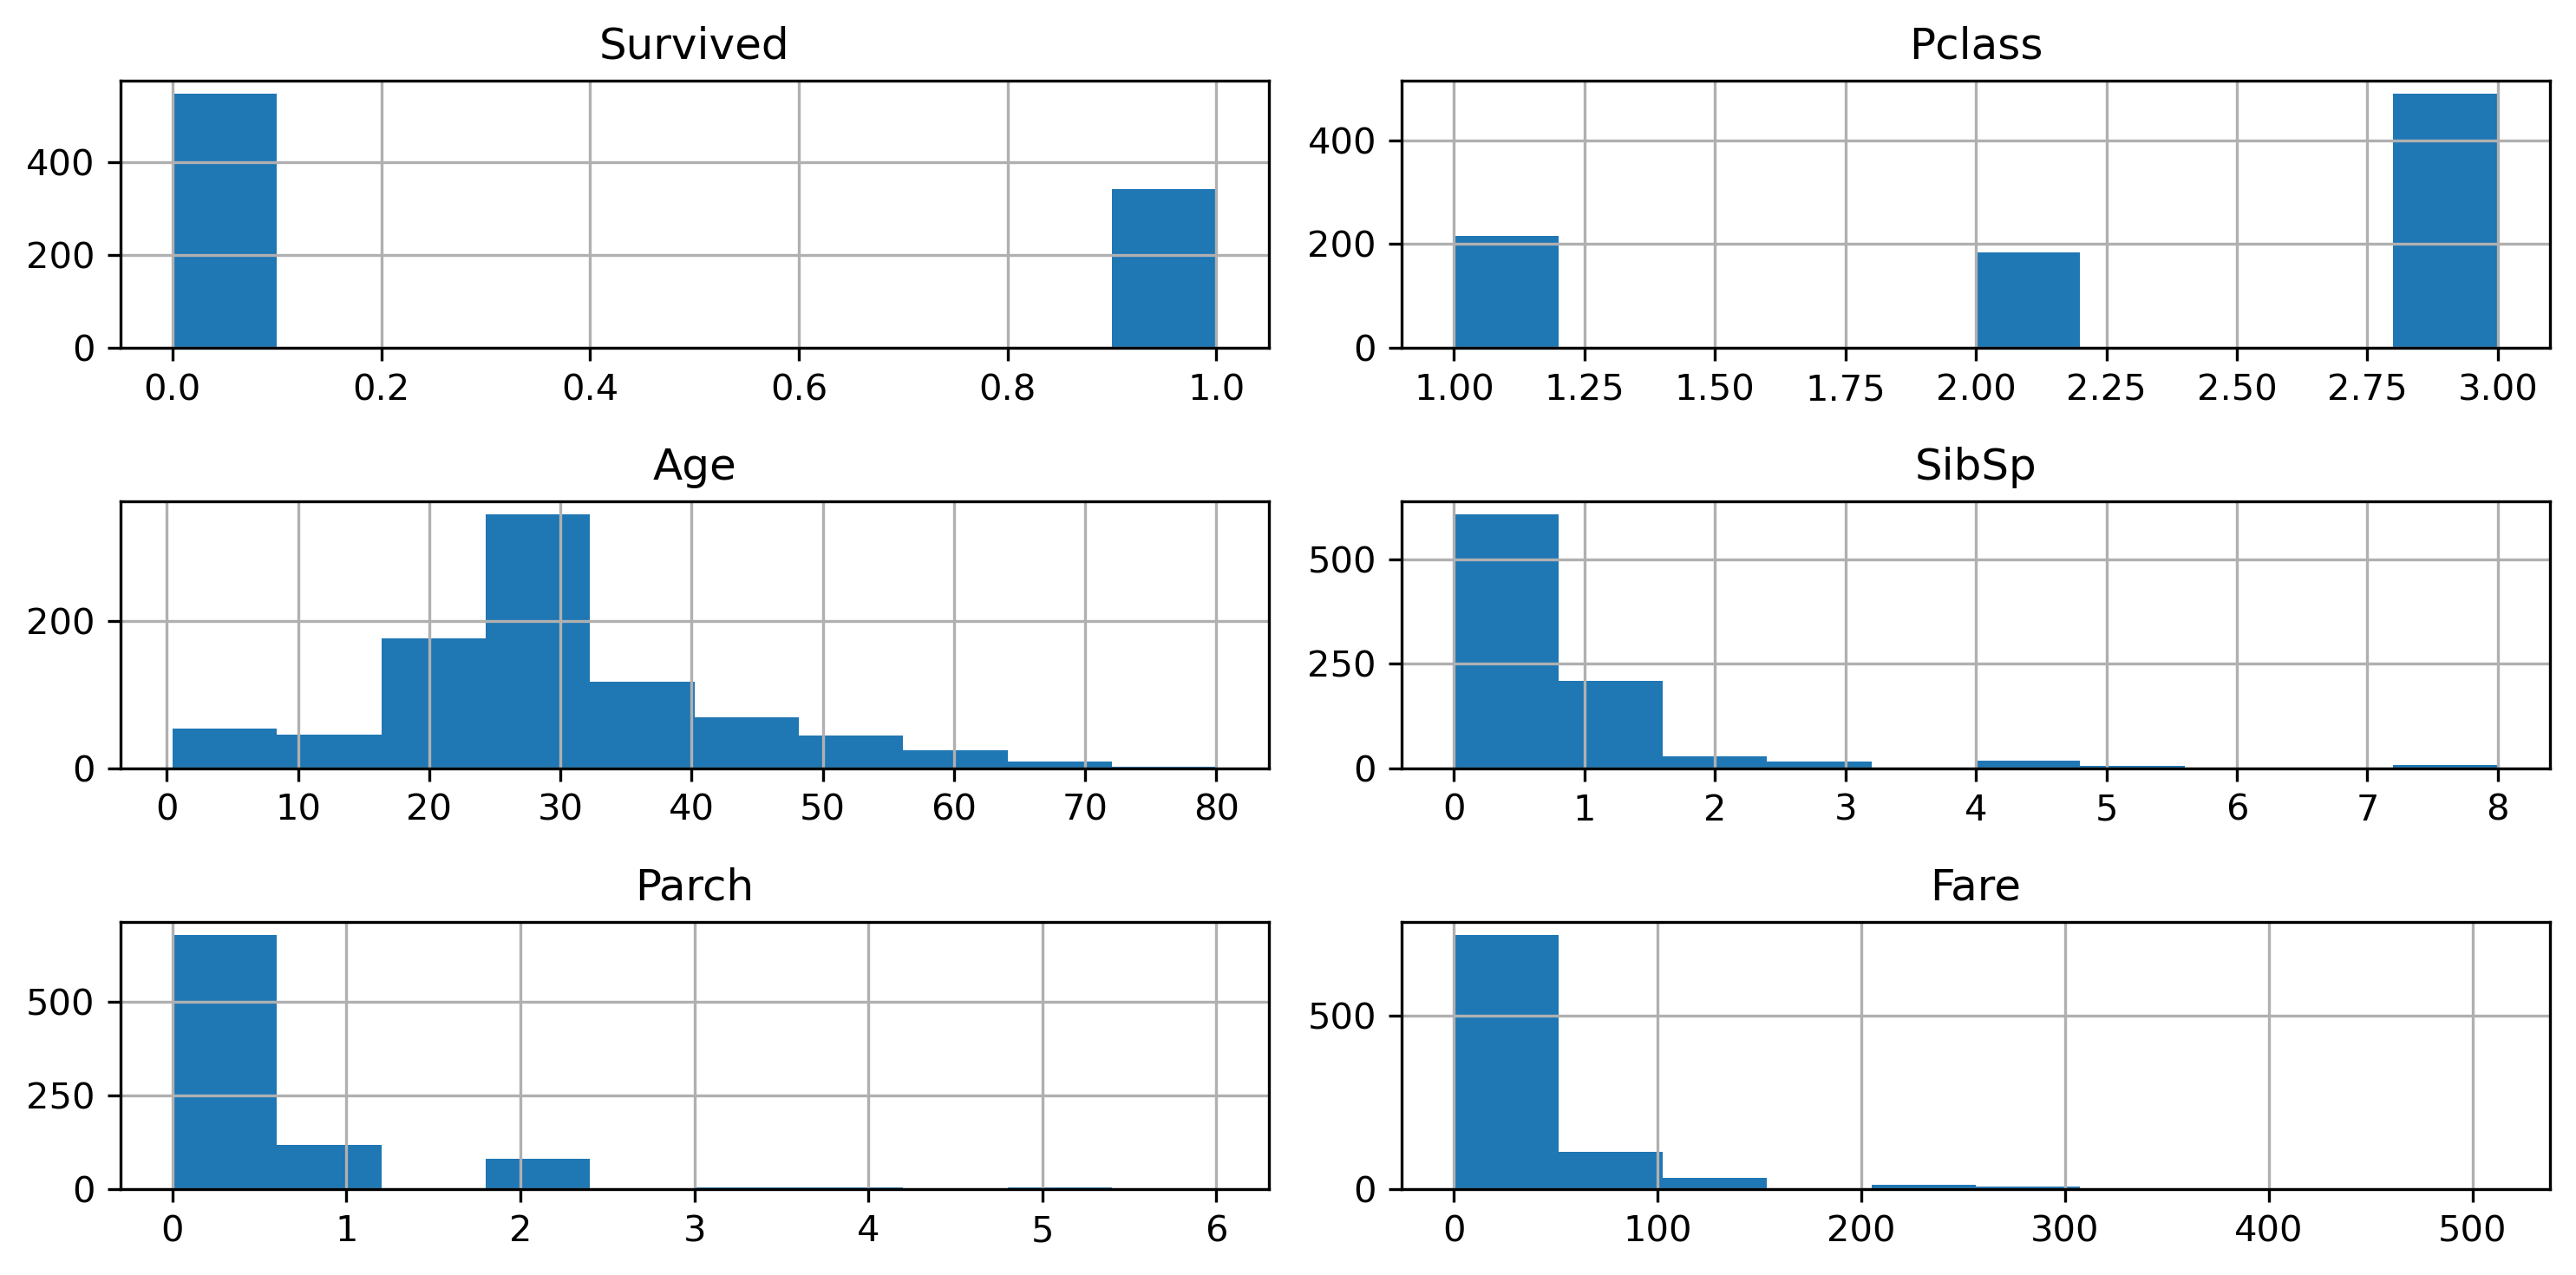

In [26]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_train_data.hist()
plt.tight_layout()

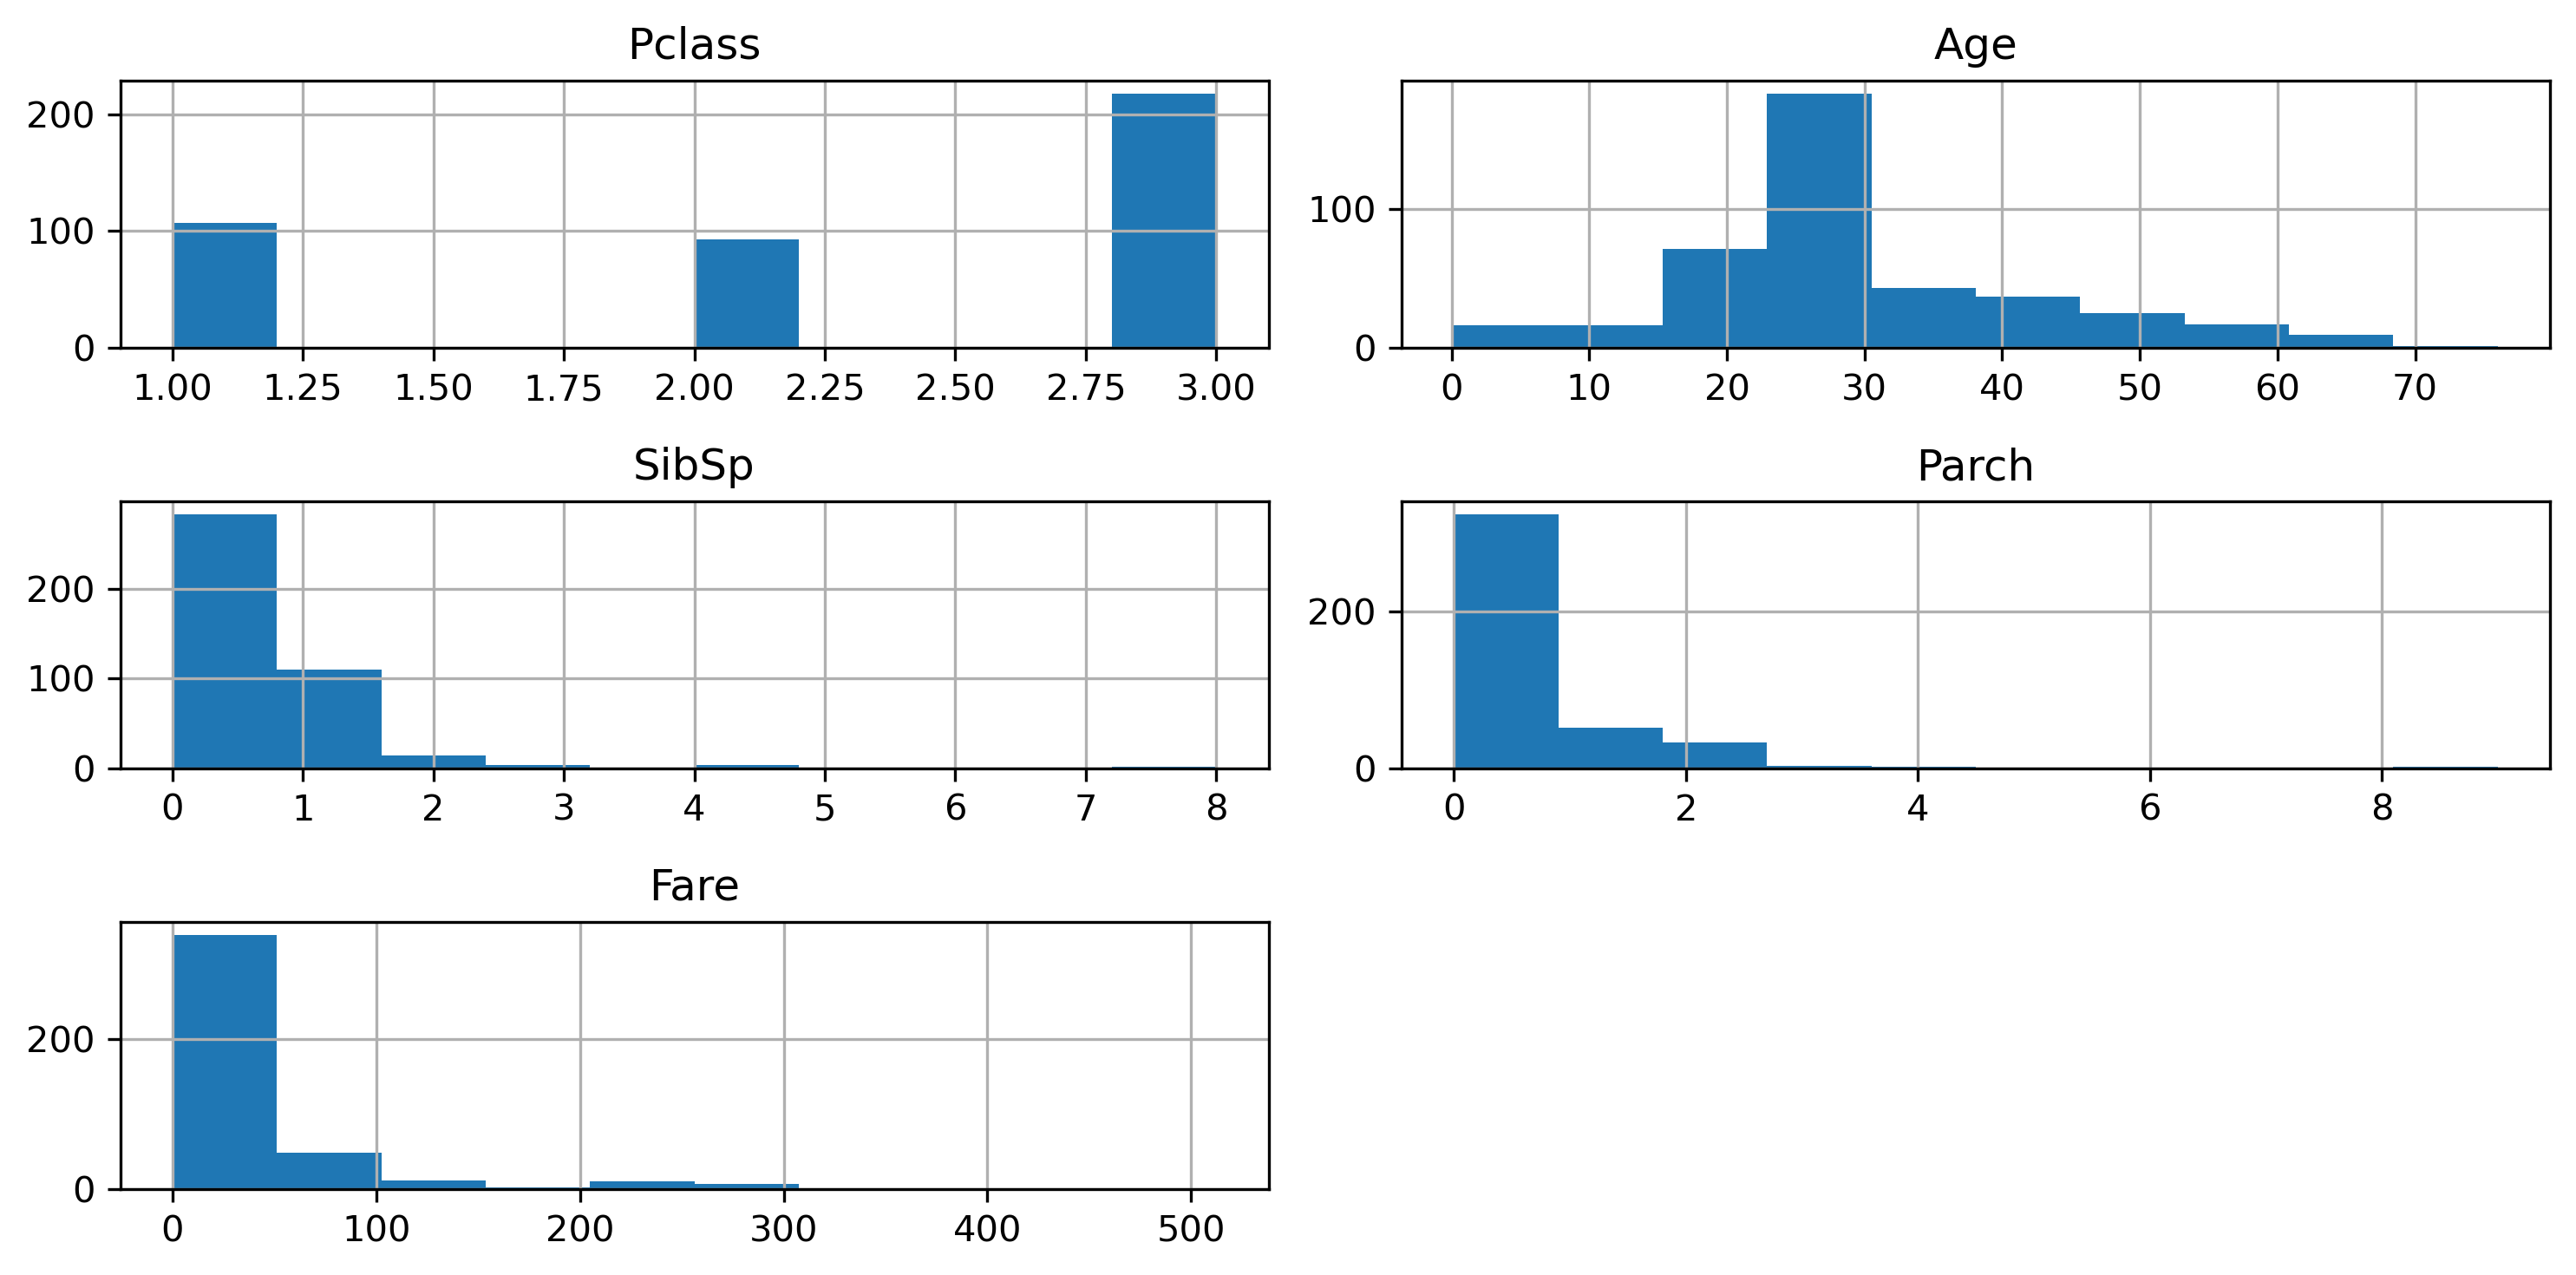

In [27]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_test_data.hist()
plt.tight_layout()

<Axes: >

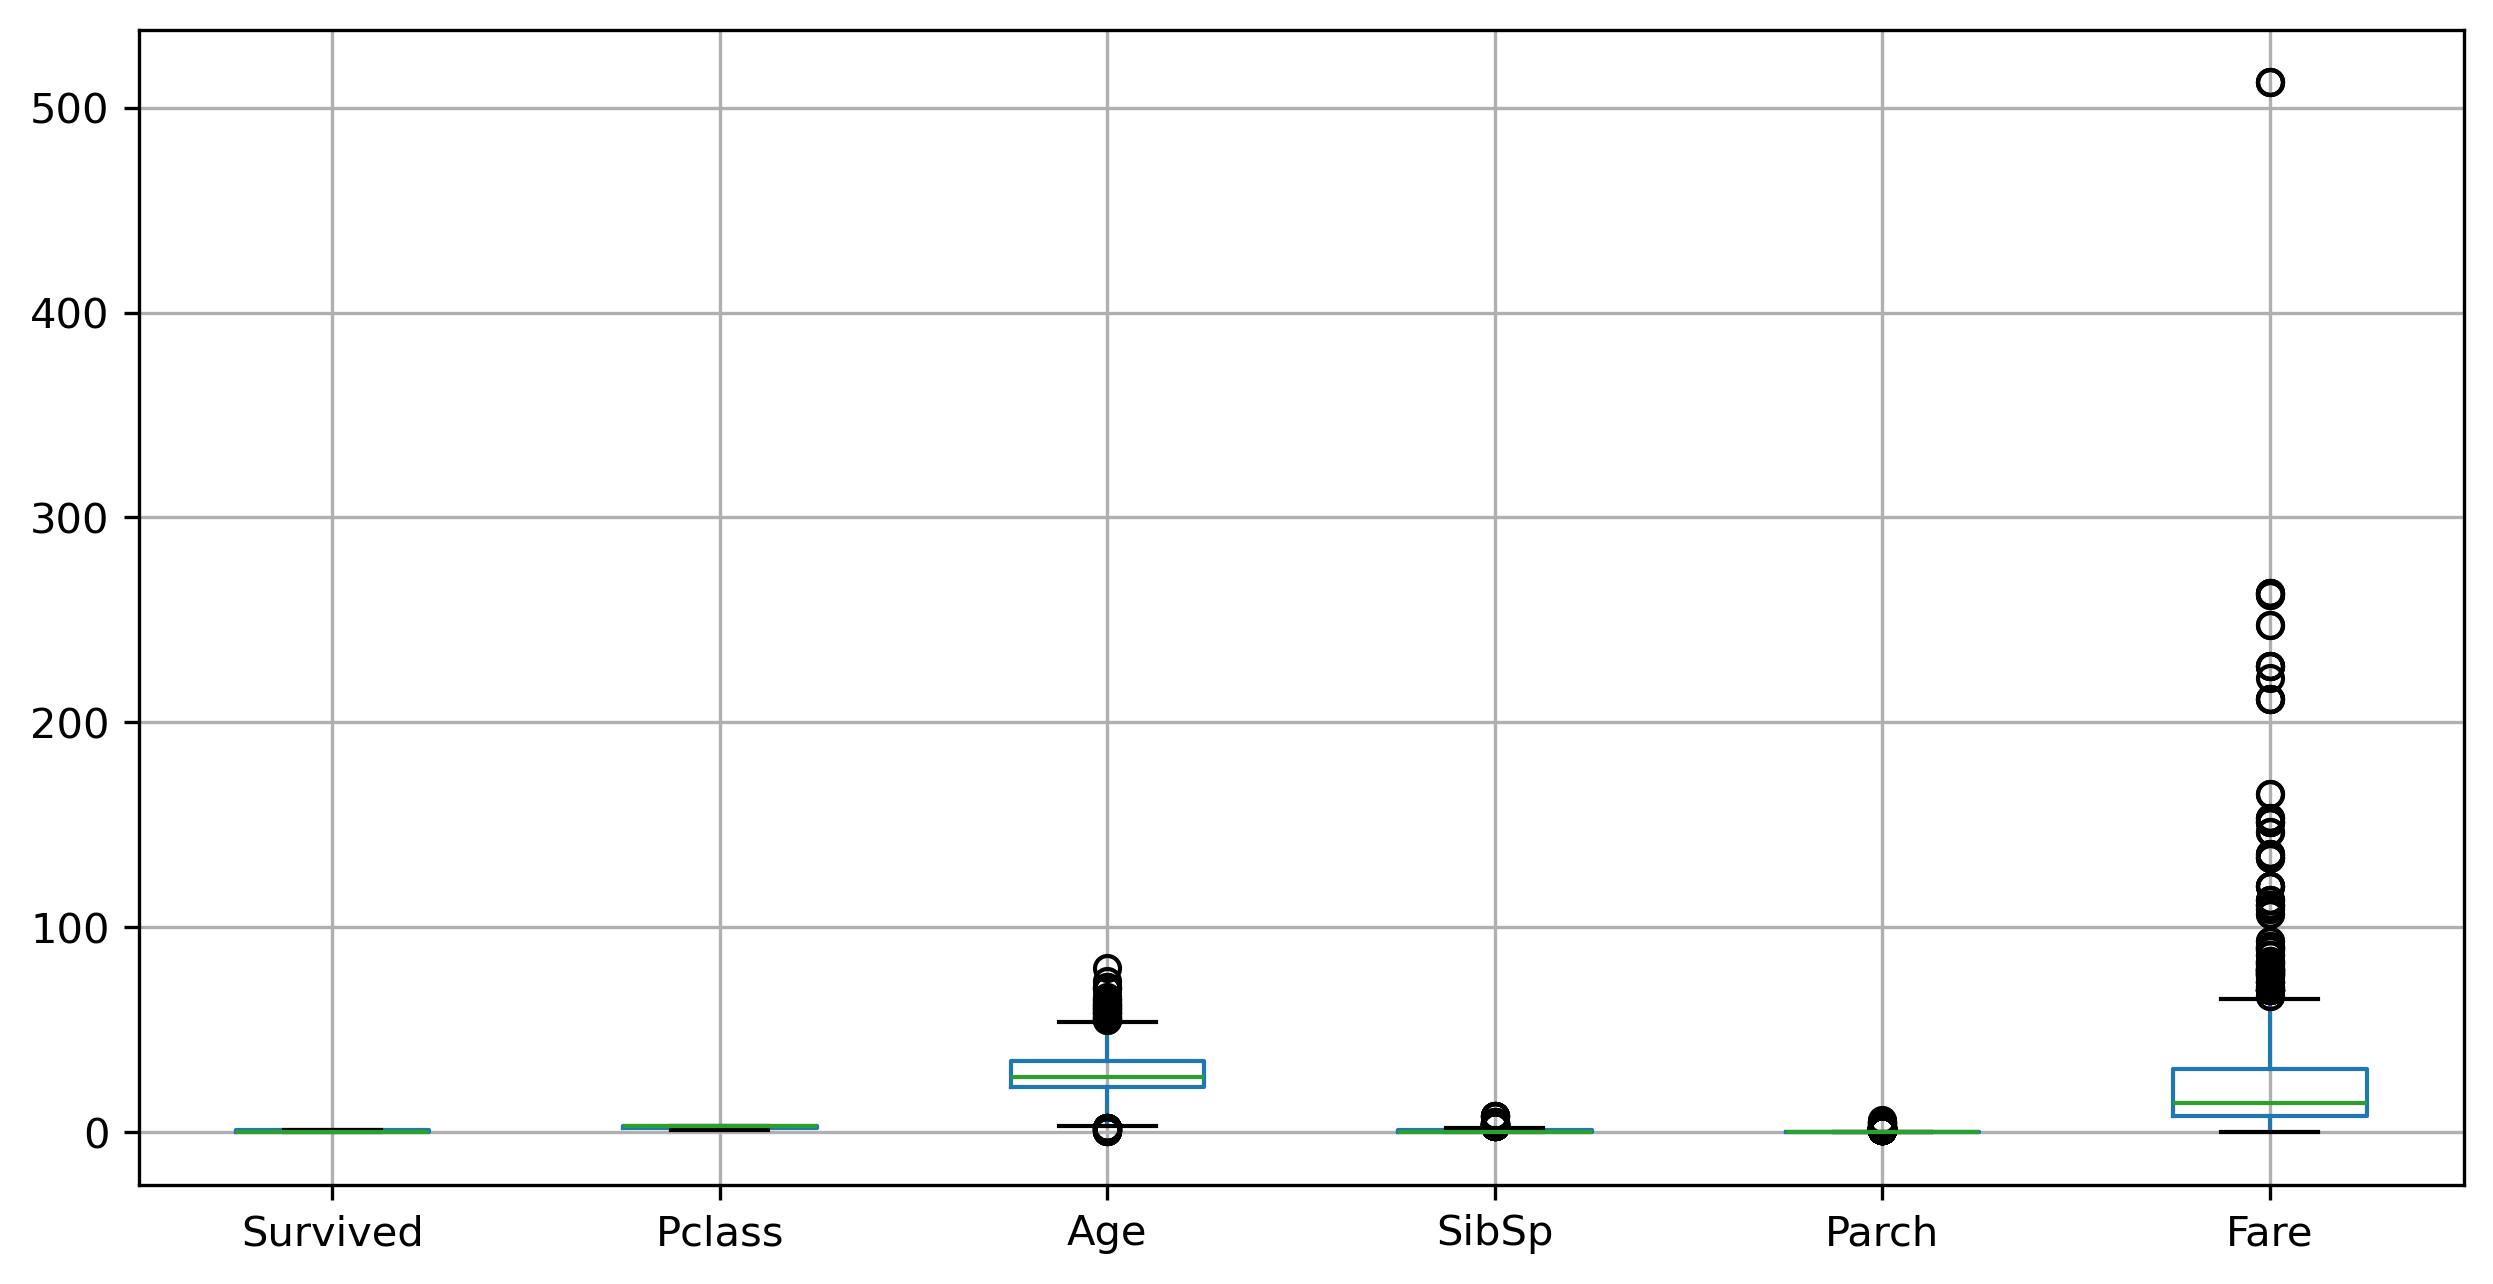

In [28]:
titanic_train_data.boxplot()

<Axes: >

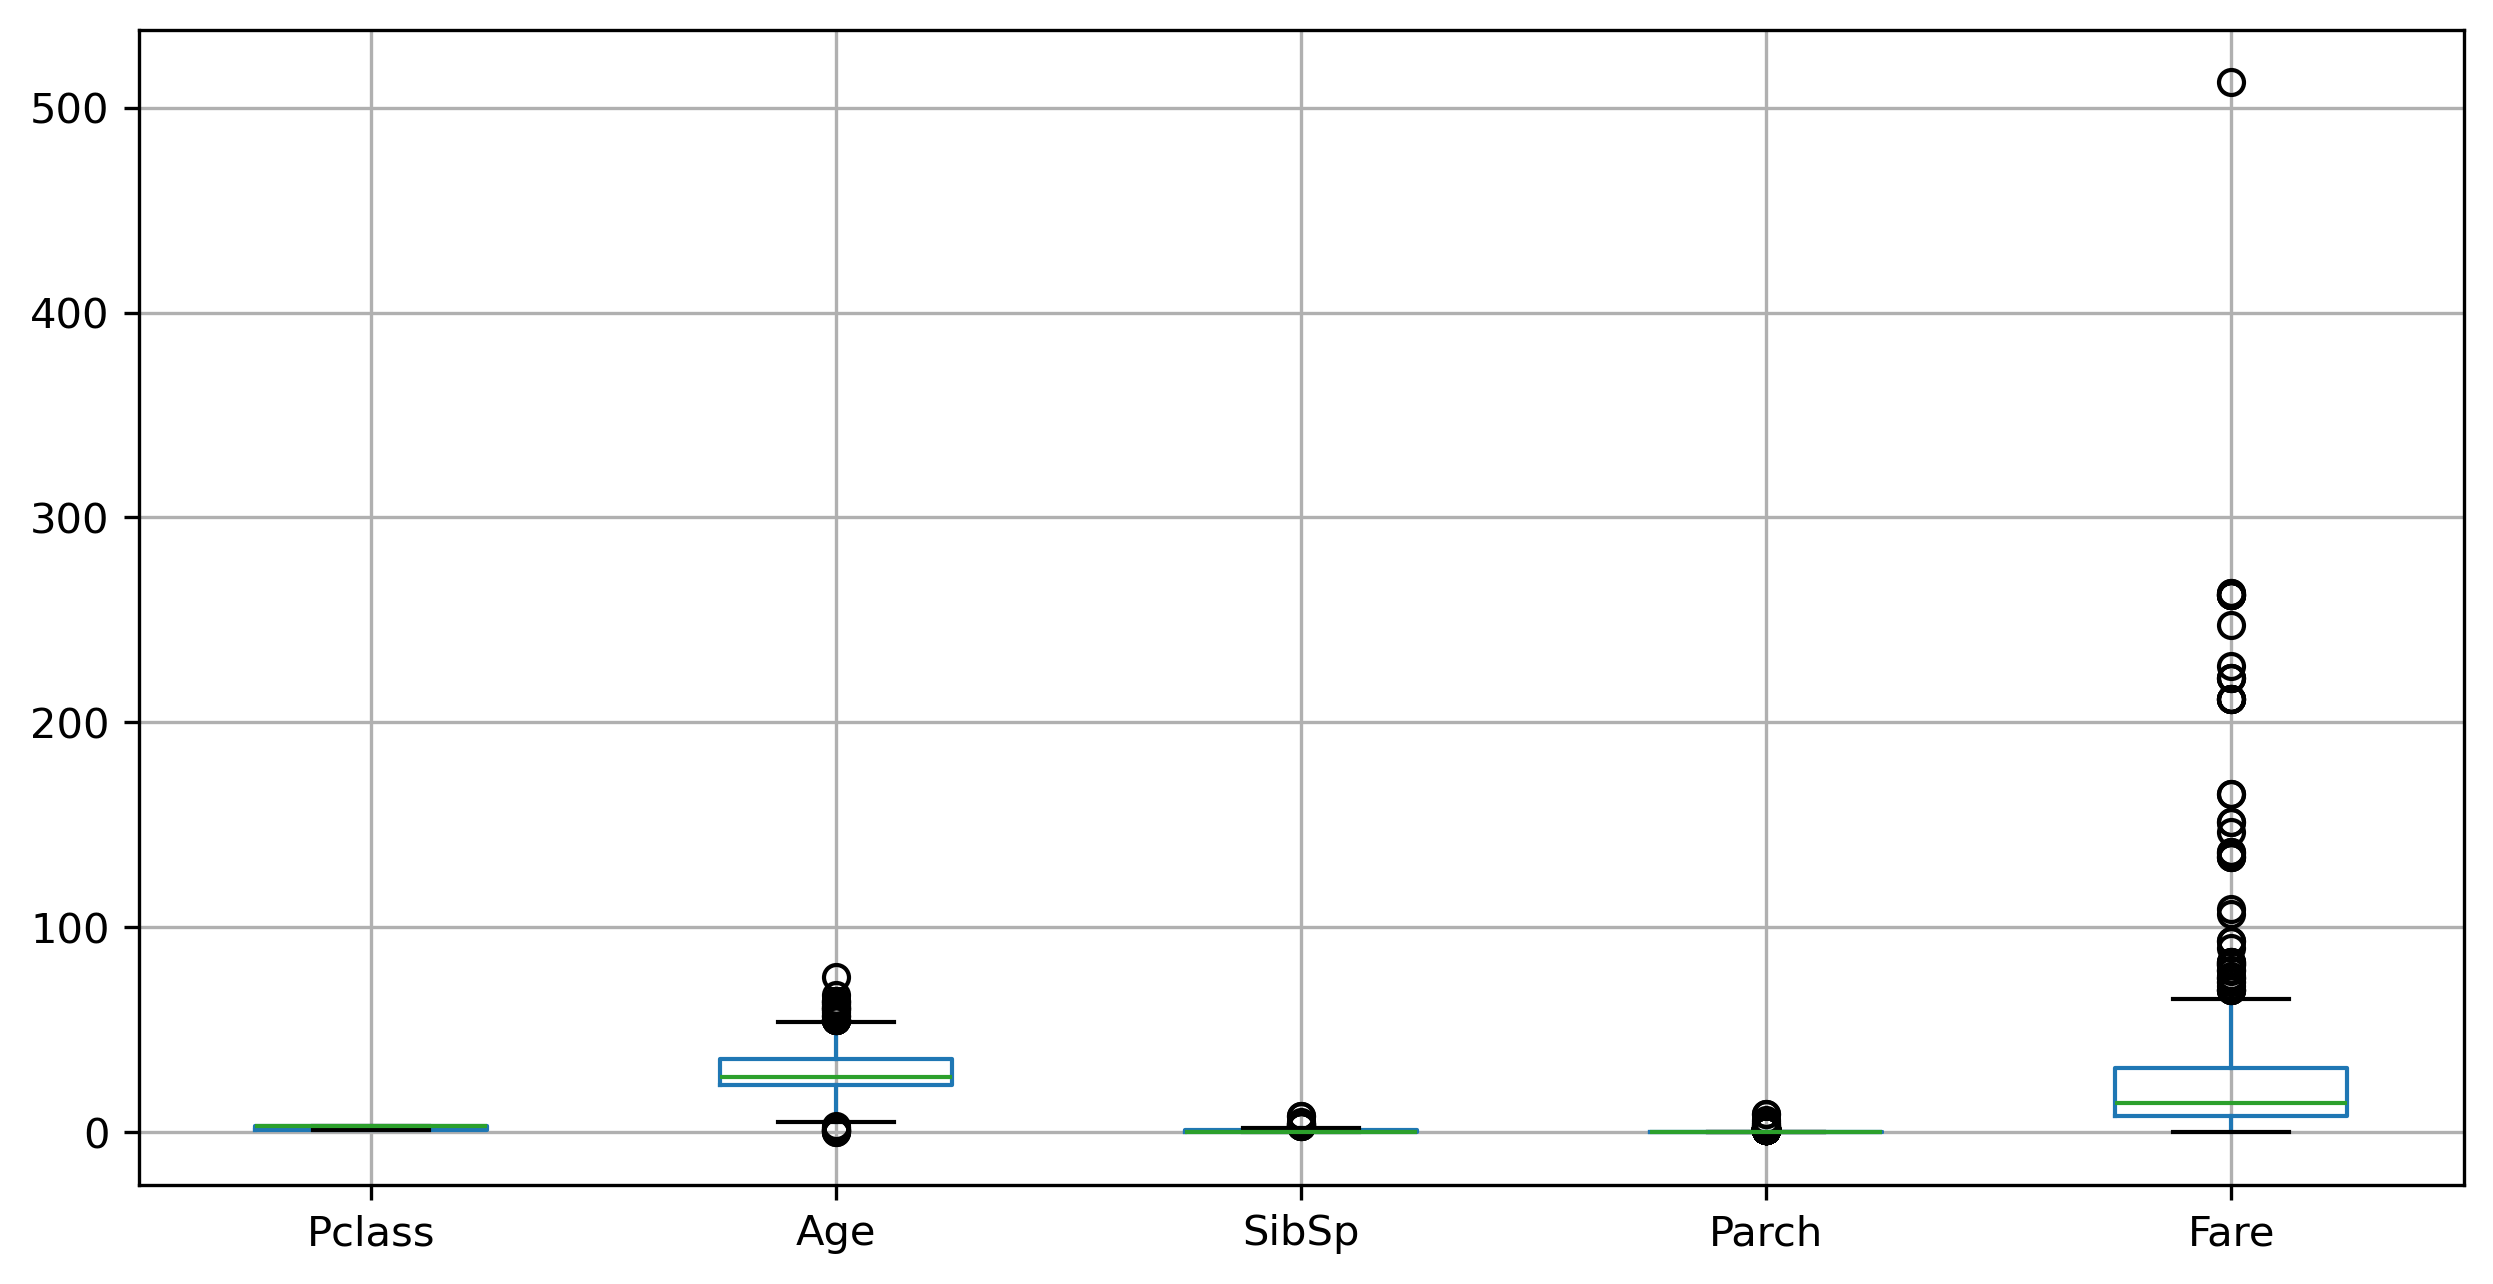

In [29]:
titanic_test_data.boxplot()

In [30]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_train_data[col] = np.where(titanic_train_data[col] > upper, upper, np.where(titanic_train_data[col] < lower, lower,titanic_train_data[col]))

In [31]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_test_data[col] = np.where(titanic_test_data[col] > upper, upper, np.where(titanic_test_data[col] < lower, lower,titanic_test_data[col]))

In [32]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [34]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [35]:
titanic_test_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [36]:
#temparary we drop these columns for outlier detection
titanic_train_data.drop(columns=['Sex','Embarked']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [47]:
#temparary we drop these columns for outlier detection
titanic_test_data.drop(columns=['Sex','Embarked']).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Axes: >

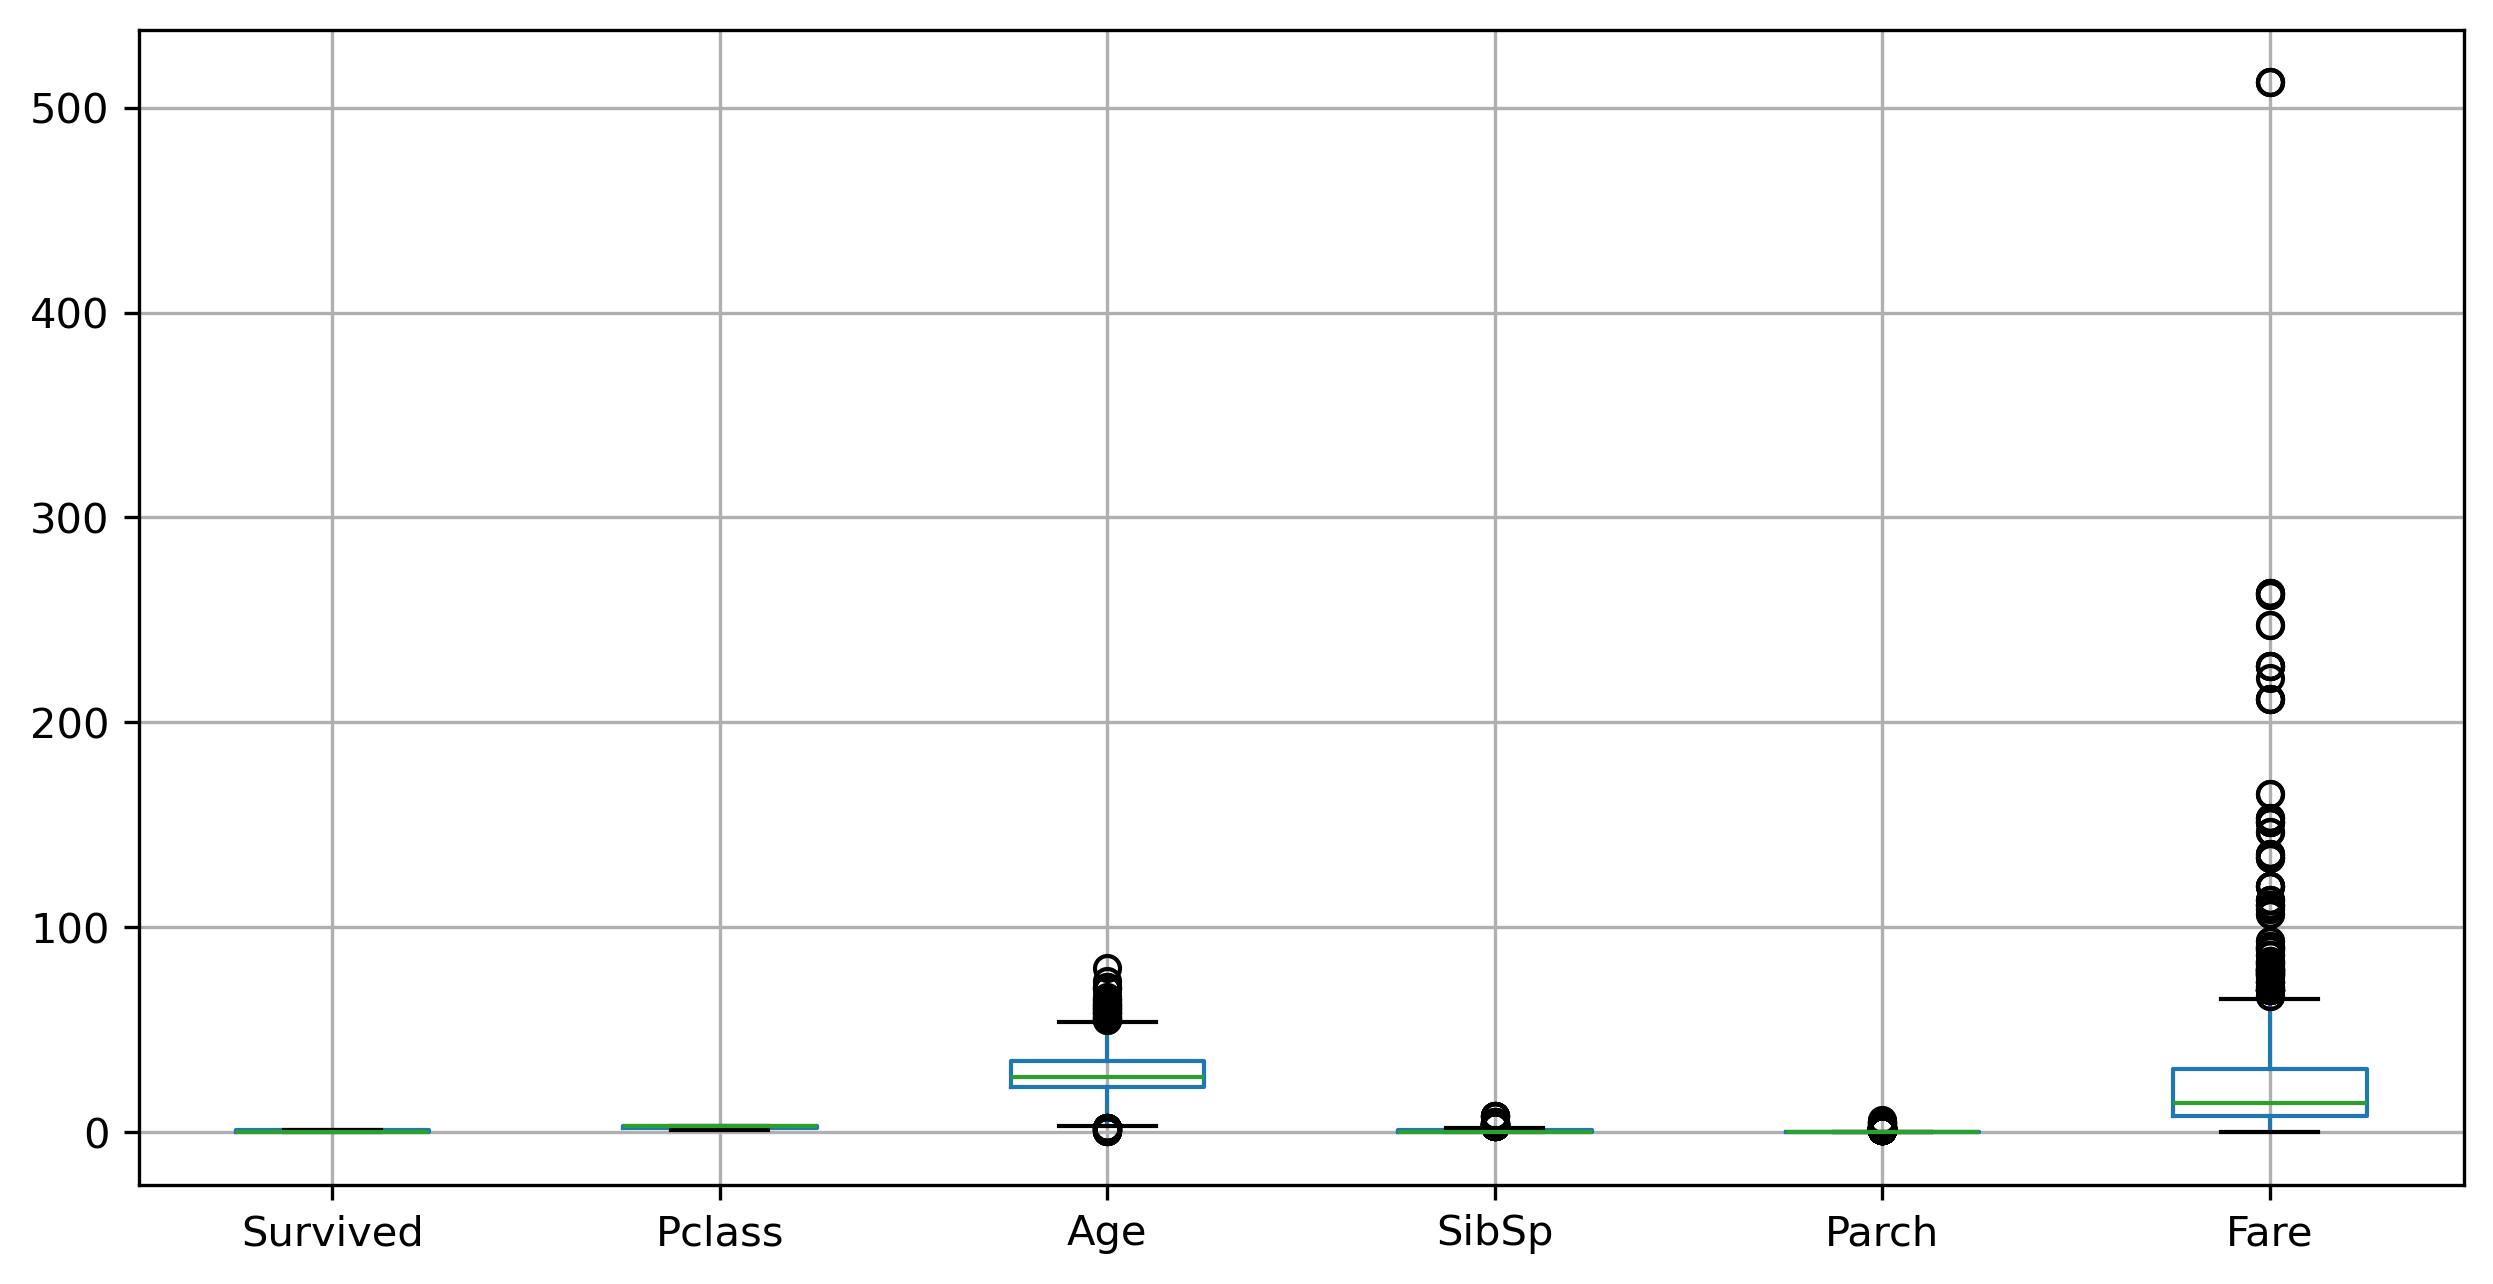

In [53]:
titanic_train_data.boxplot()

<Axes: >

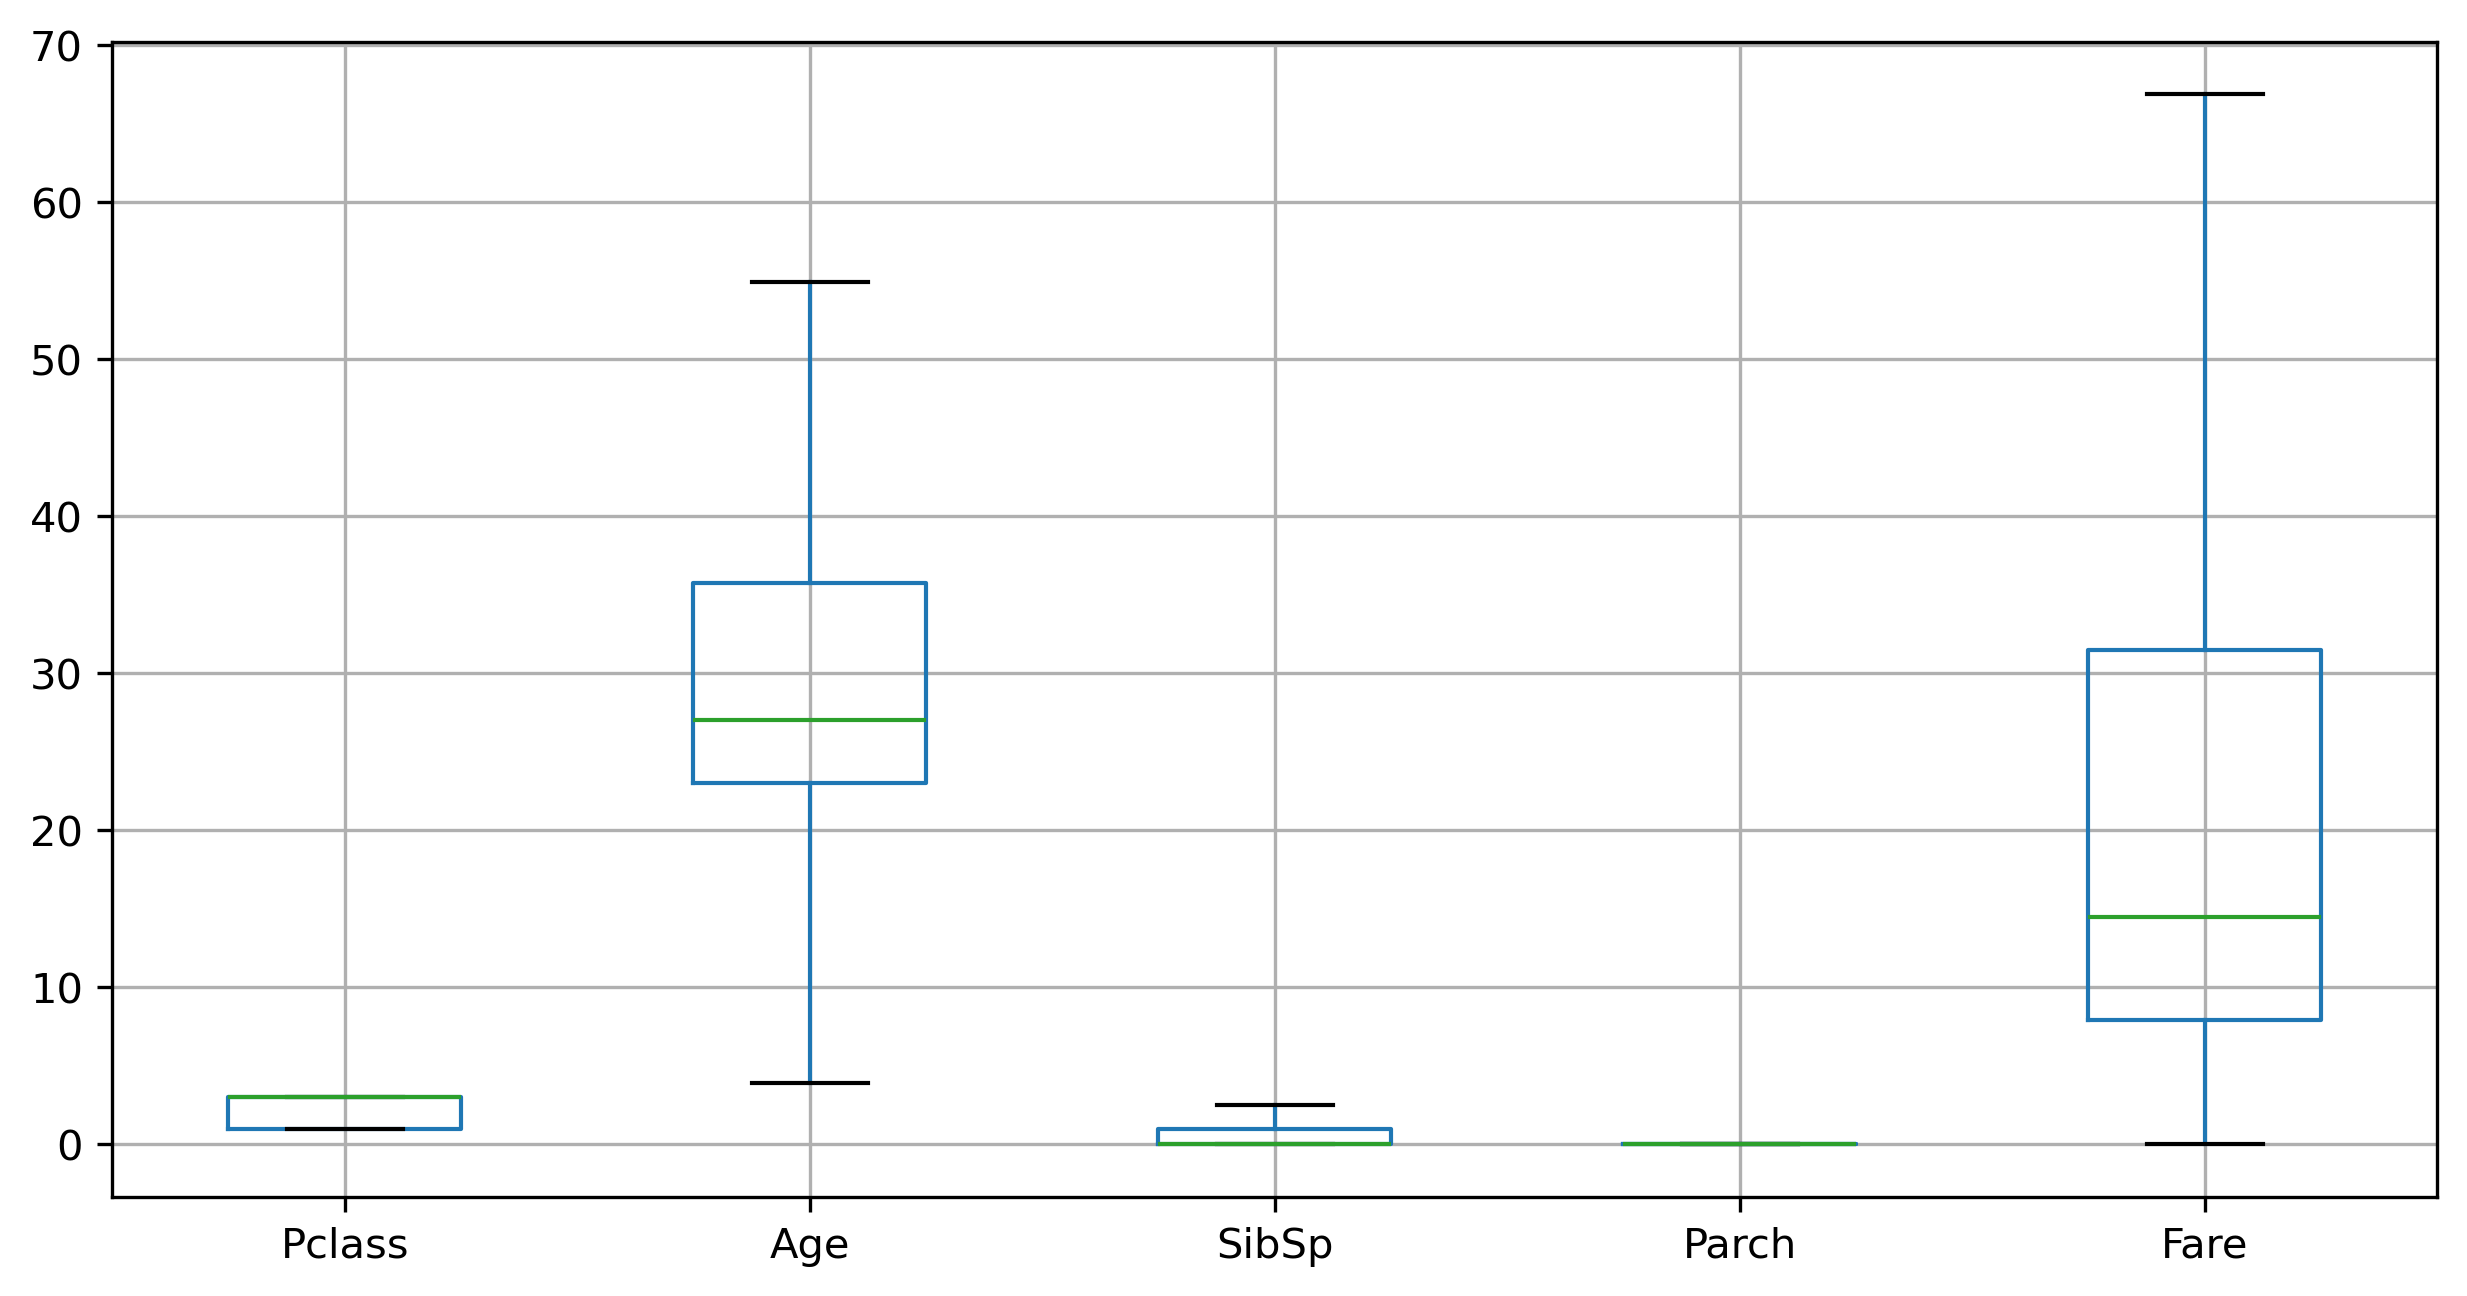

In [54]:
titanic_test_data.boxplot()

In [55]:
#scatter and correlation
titanic_train_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [56]:
titanic_test_data.head()

Pclass     Sex     Age  SibSp  Parch     Fare Embarked
0     3.0    male  34.500    0.0    0.0   7.8292        Q
1     3.0  female  47.000    1.0    0.0   7.0000        S
2     2.0    male  54.875    0.0    0.0   9.6875        Q
3     3.0    male  27.000    0.0    0.0   8.6625        S
4     3.0  female  22.000    1.0    0.0  12.2875        S

<Axes: xlabel='Pclass', ylabel='Fare'>

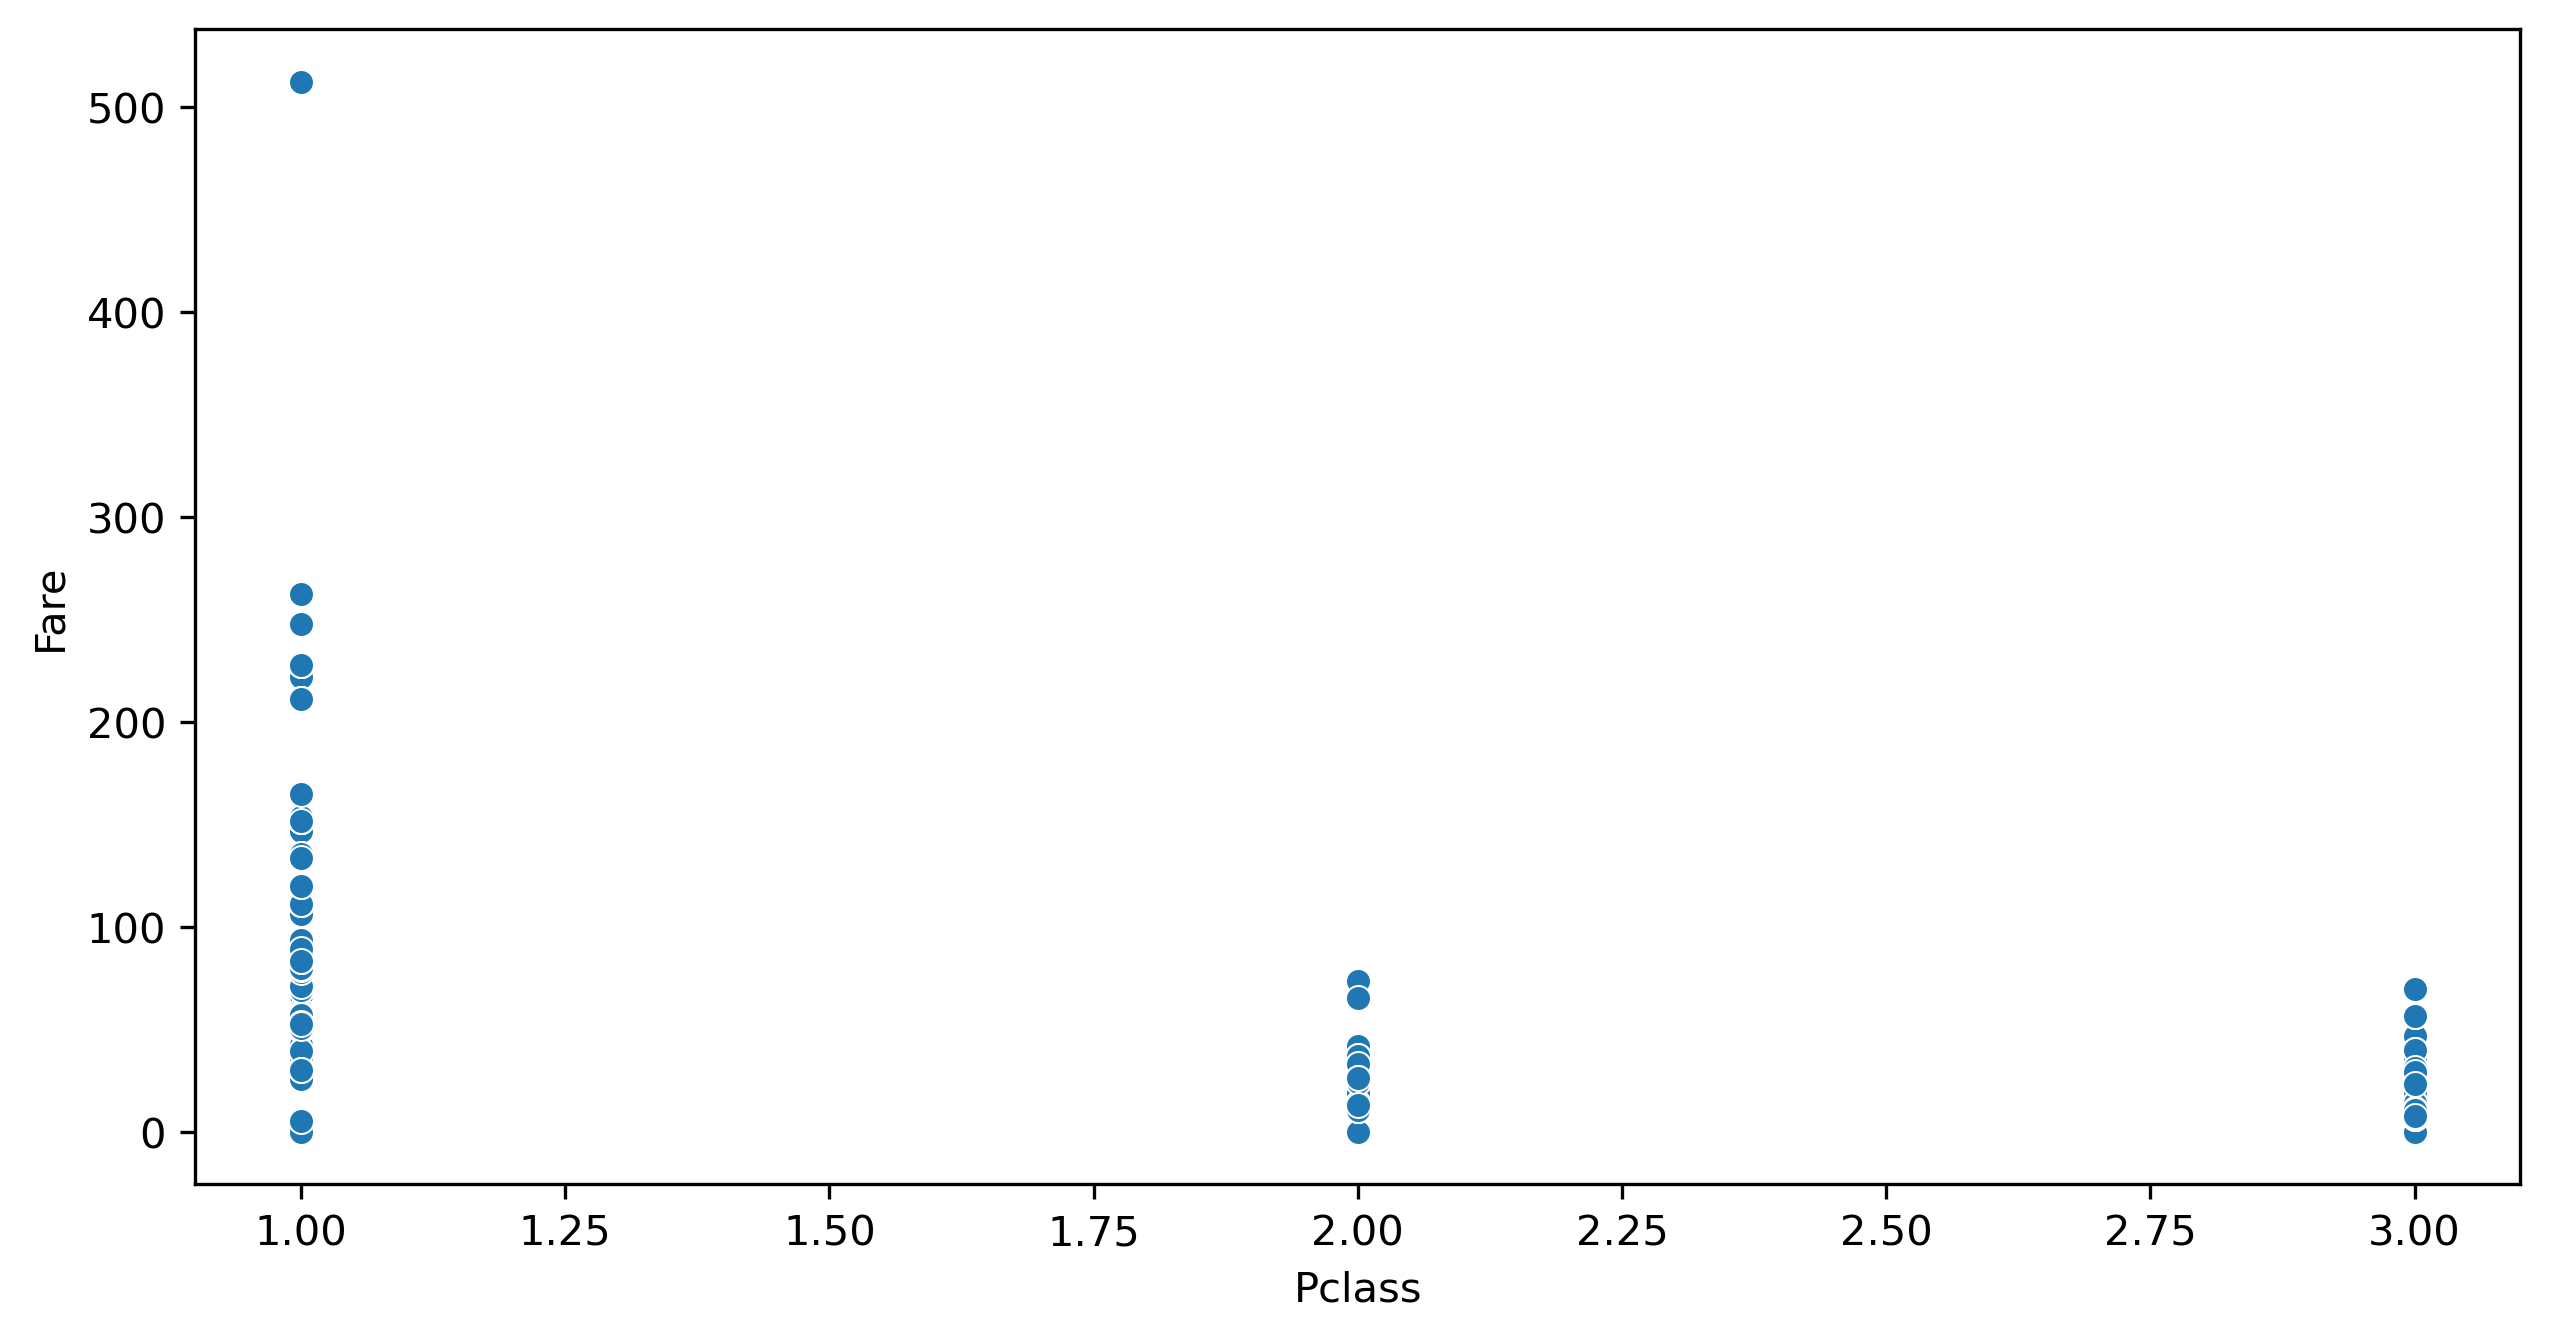

In [57]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

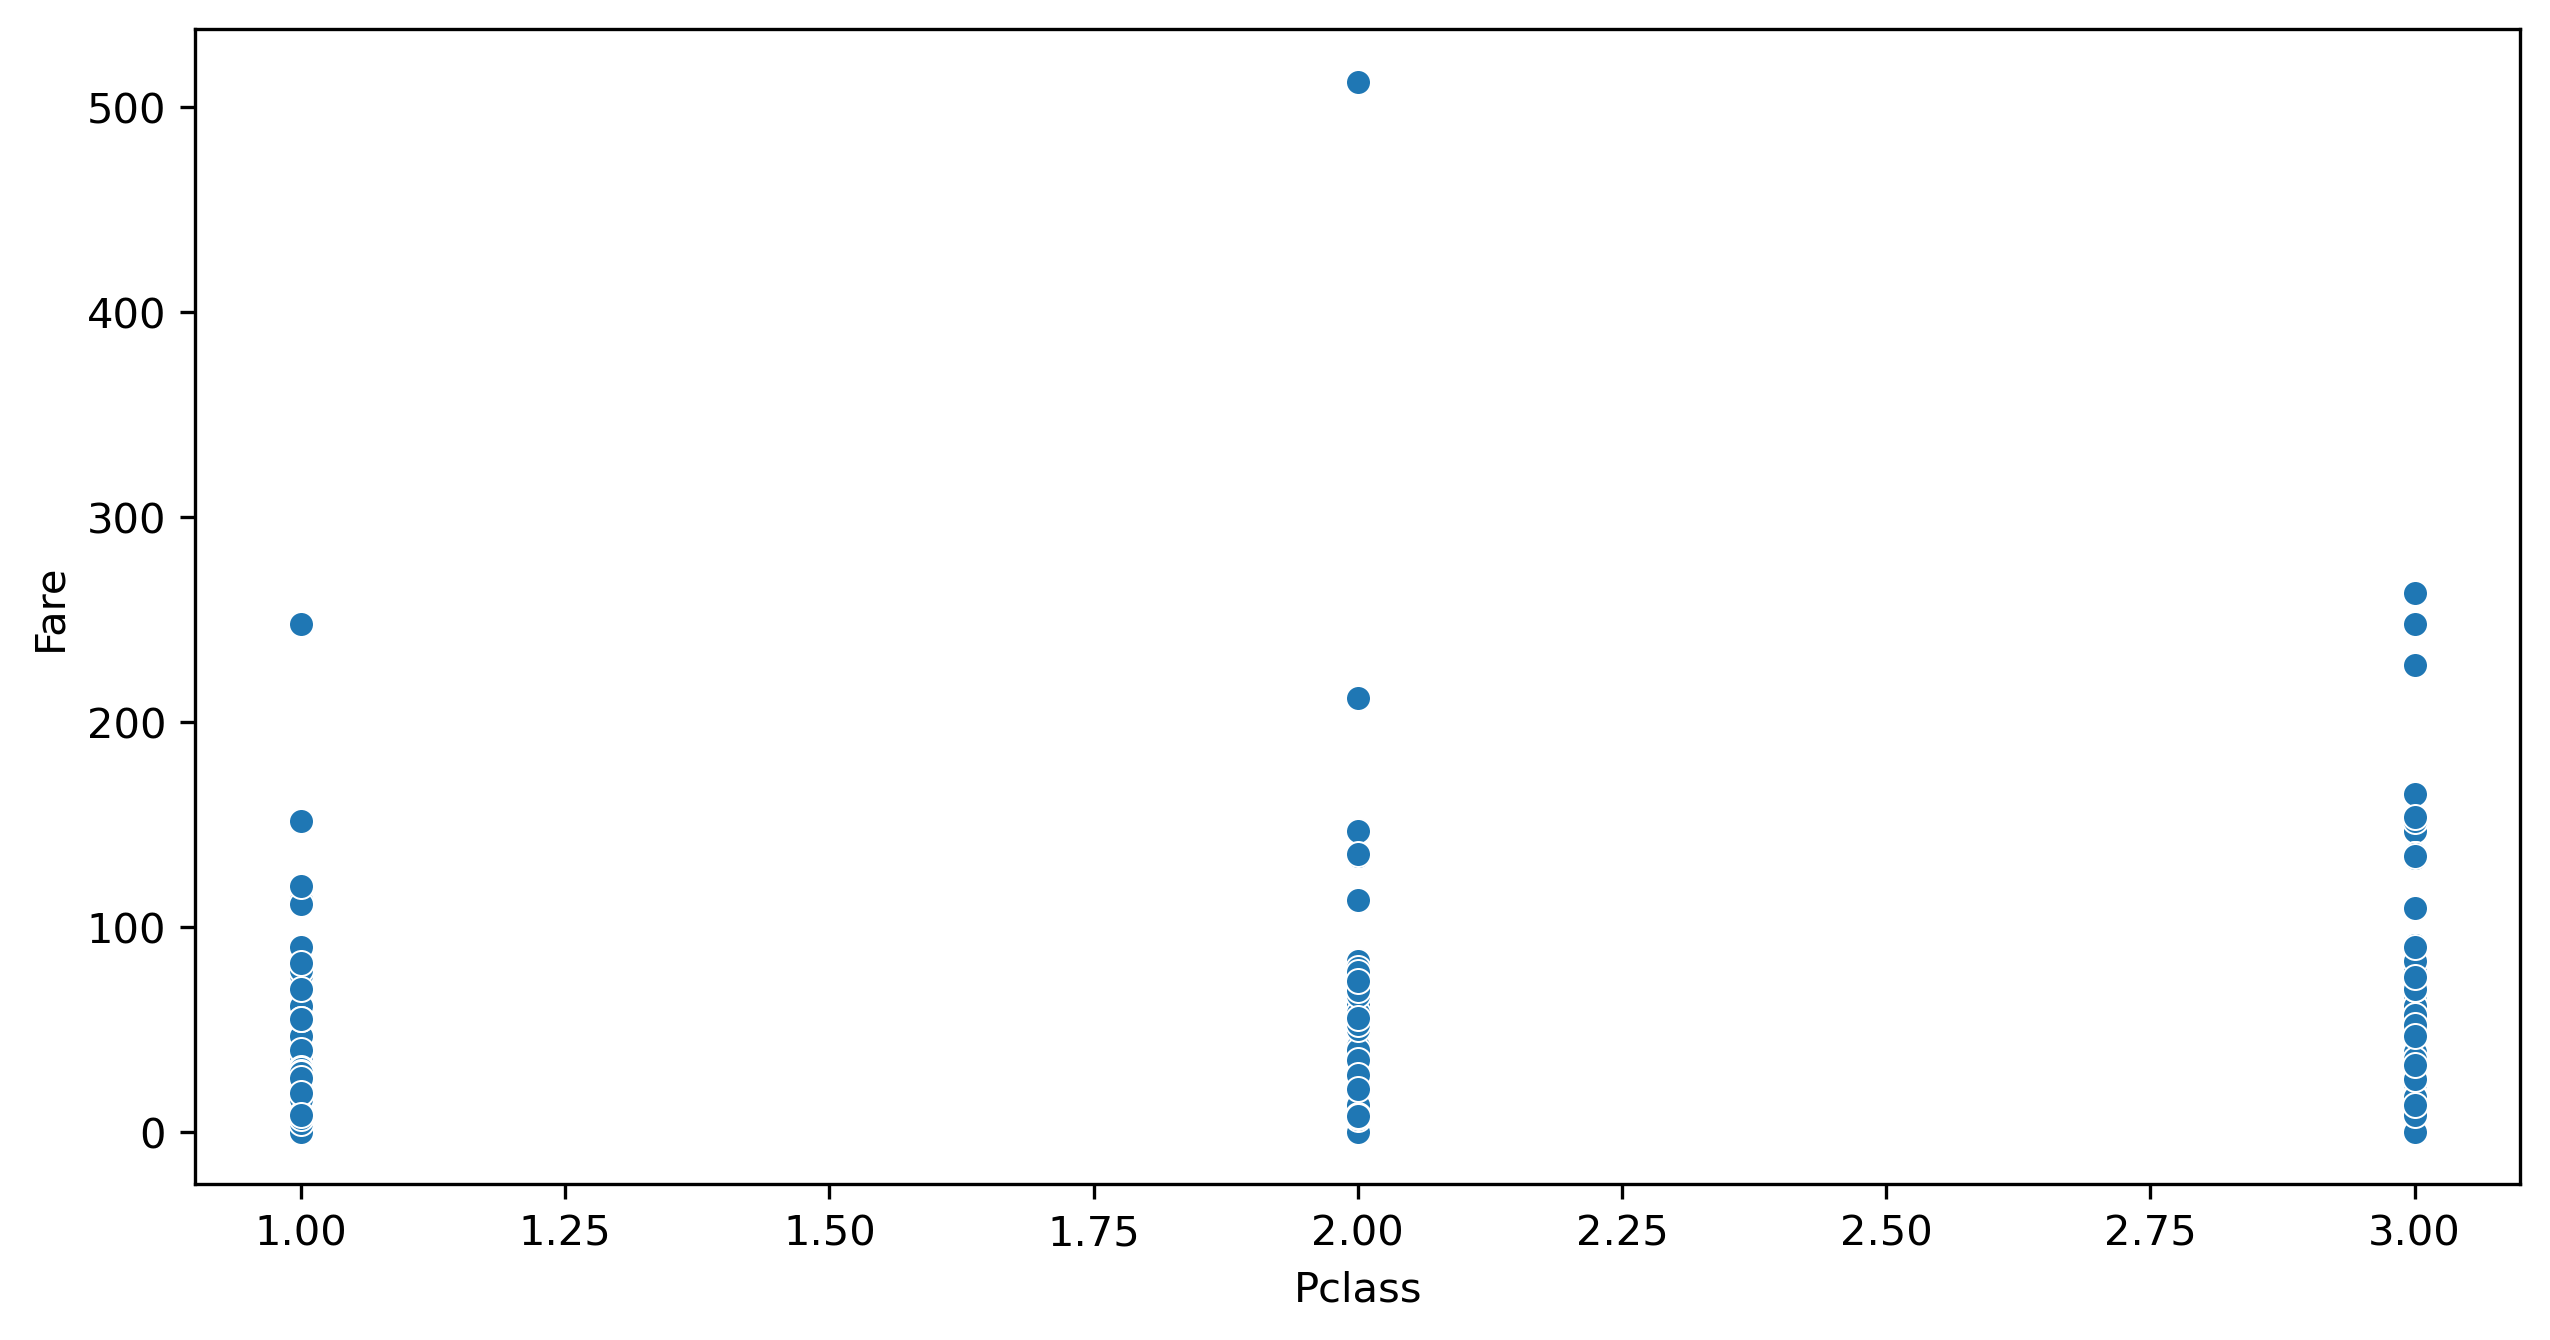

In [58]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

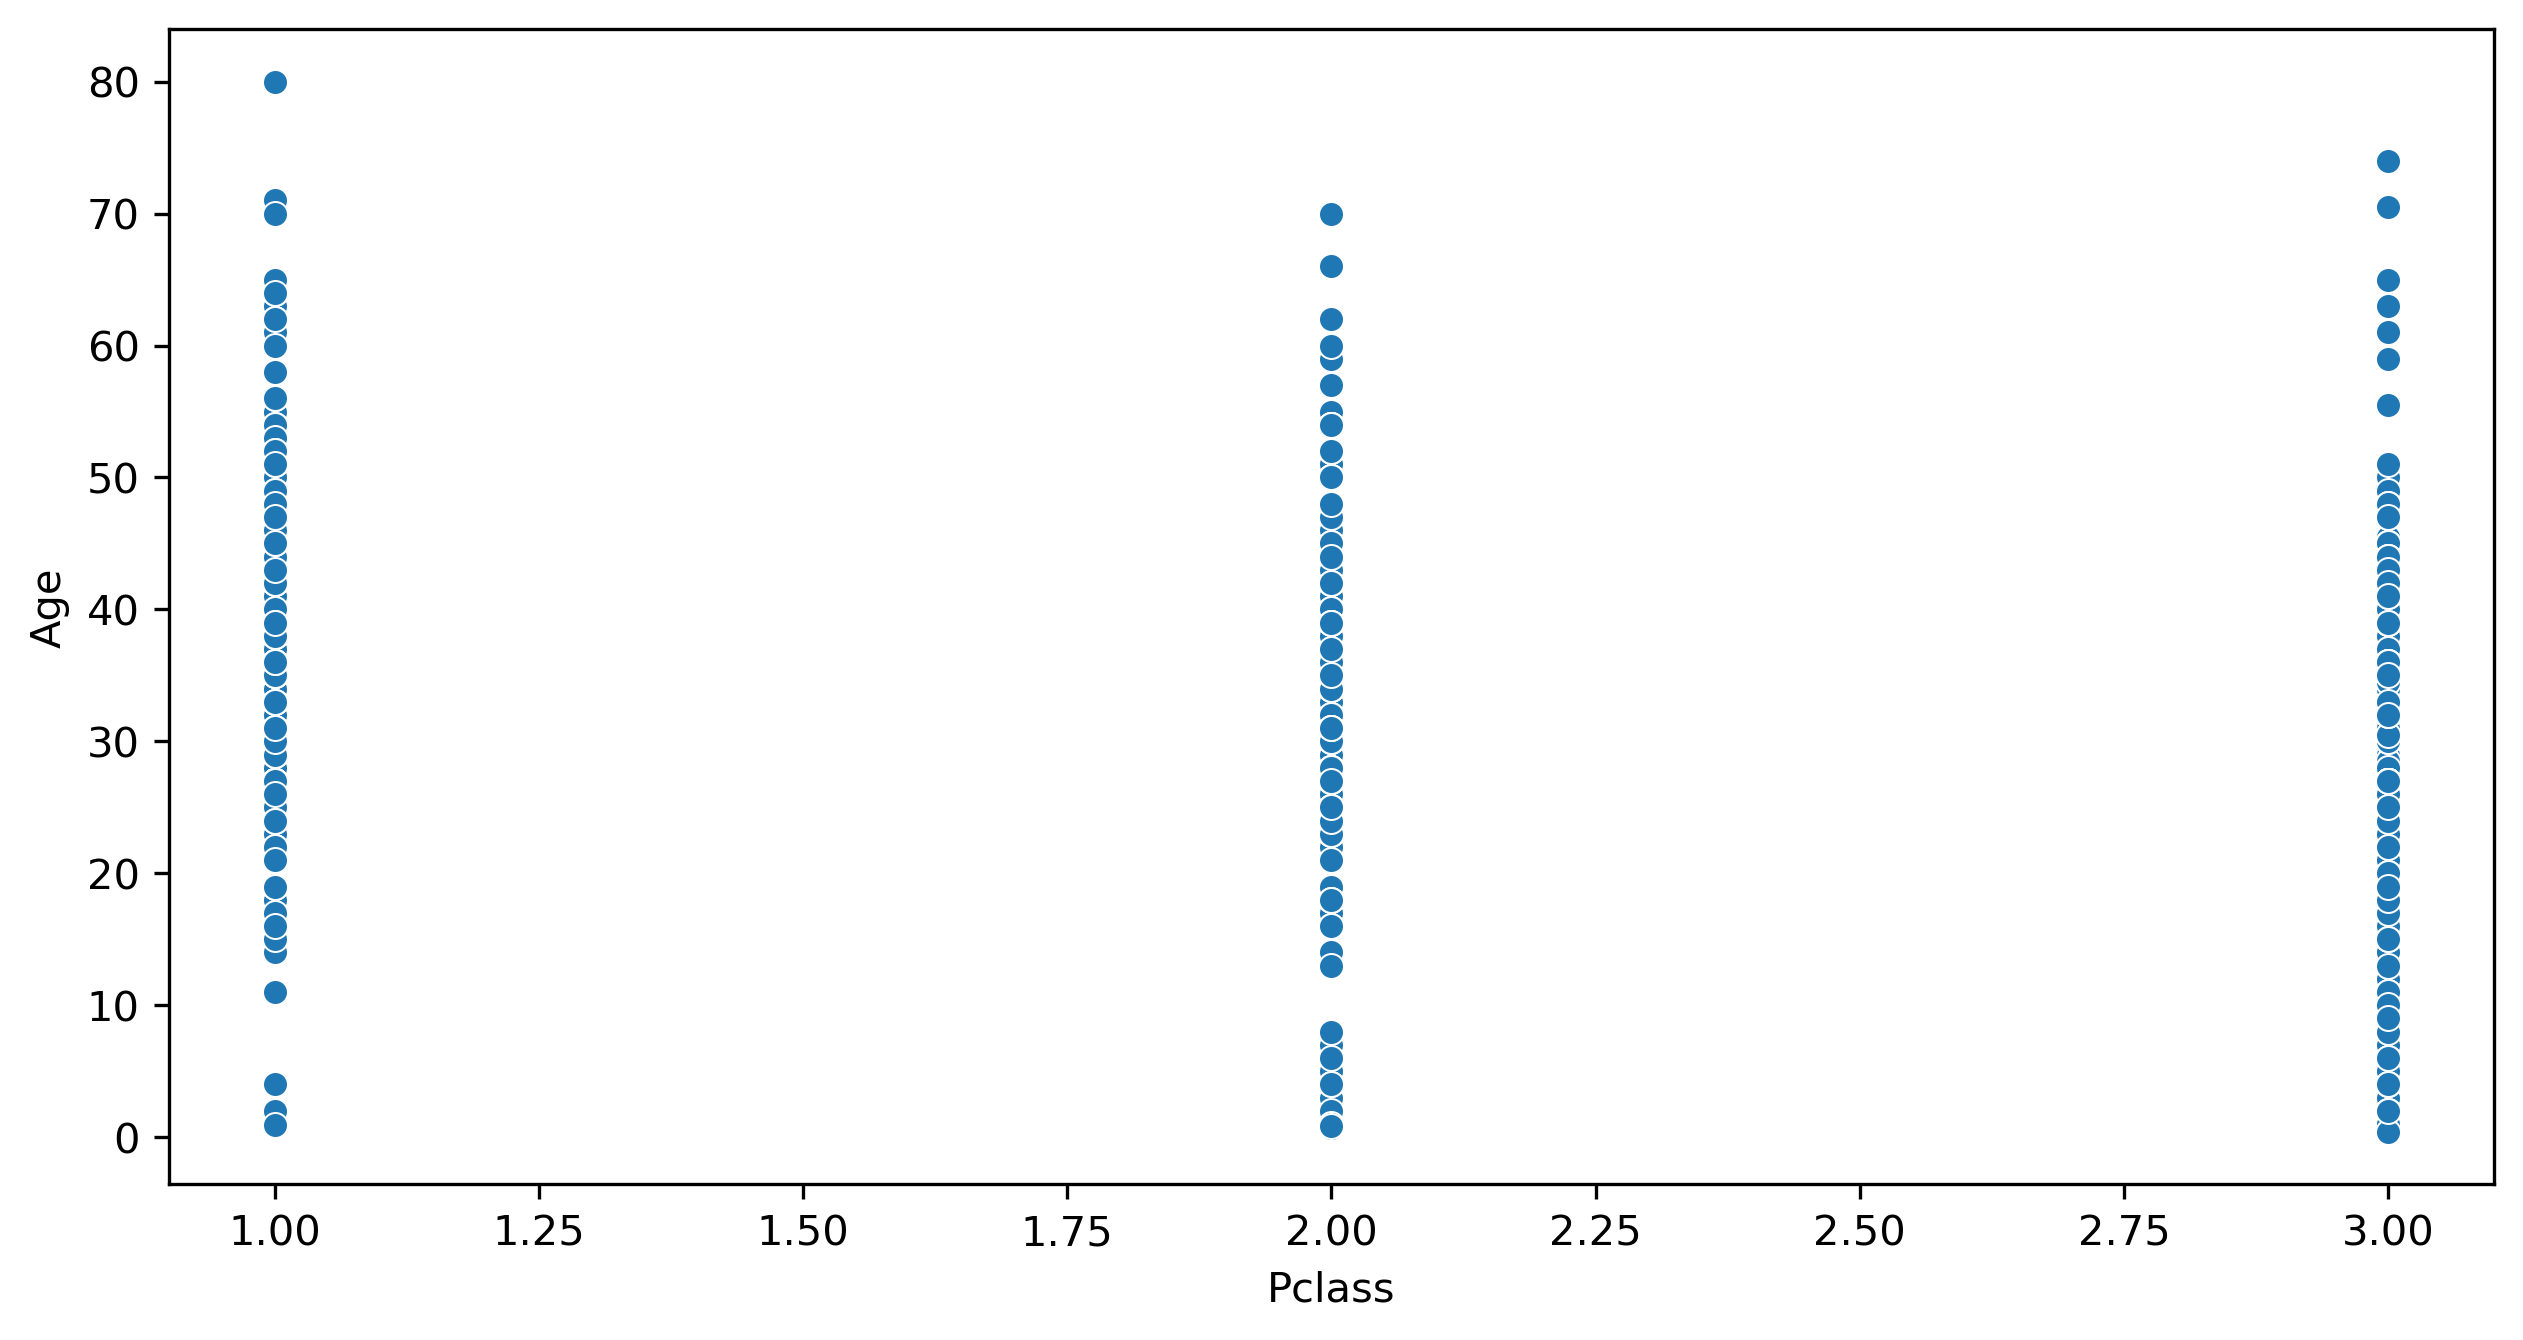

In [59]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

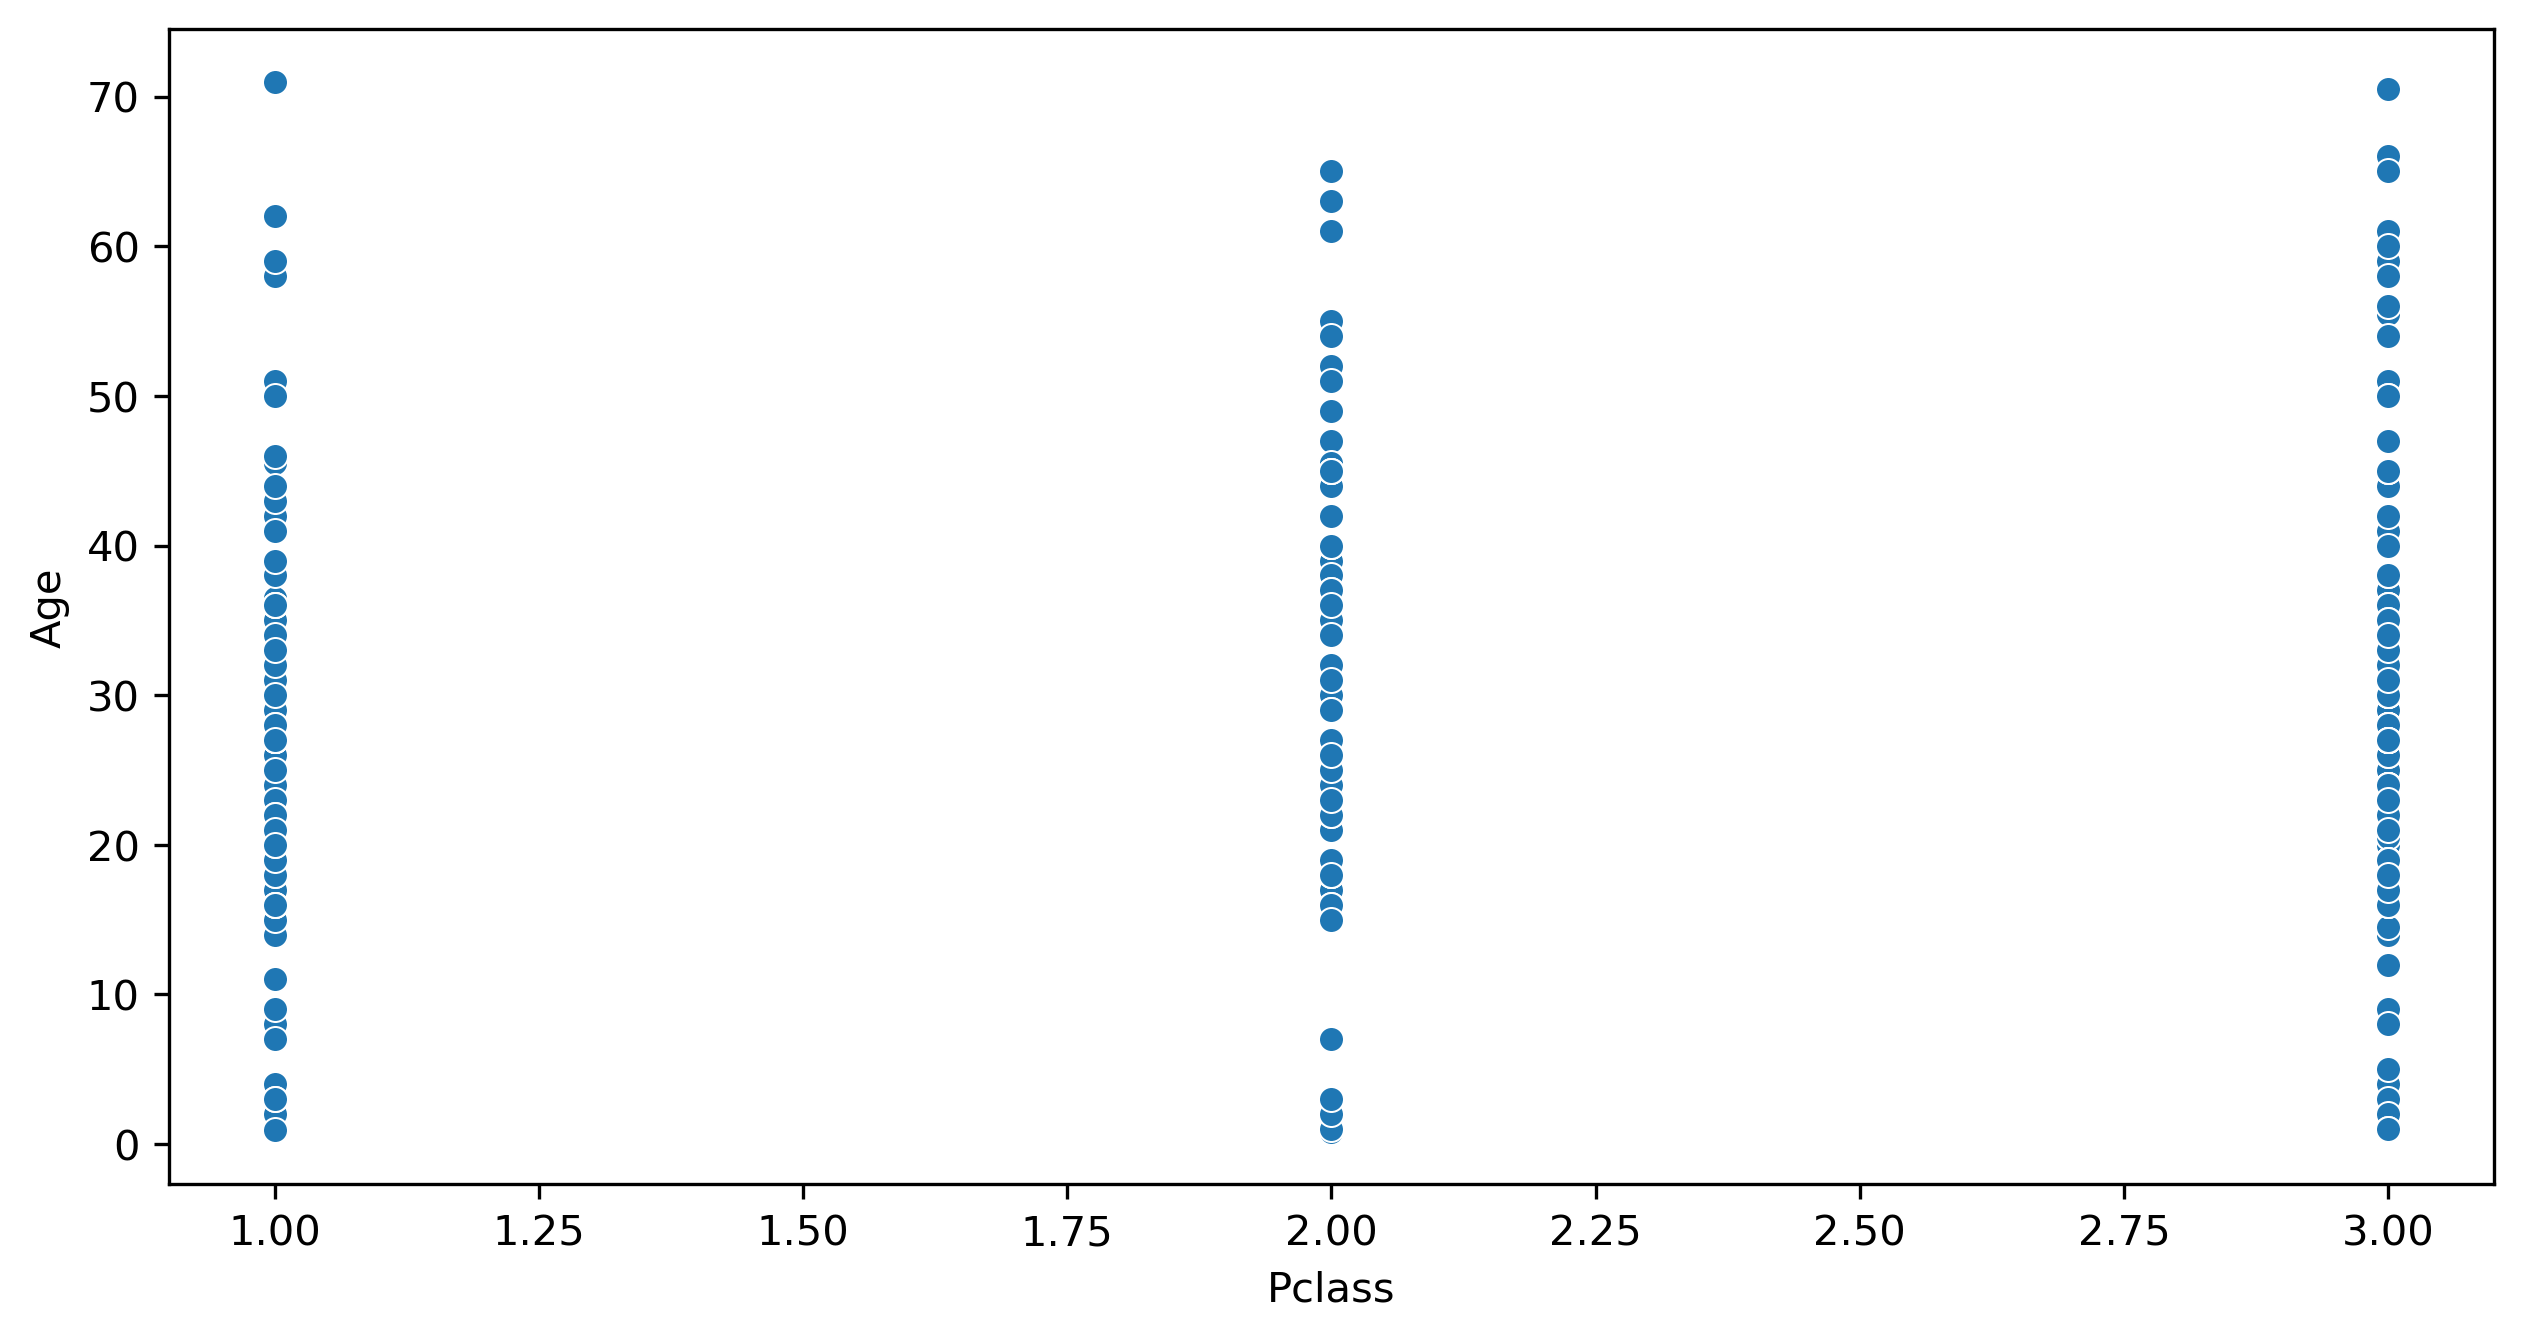

In [60]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Age'])

In [63]:
titanic_train_data.drop(columns=['Parch'], inplace=True)

In [93]:
titanic_test_data.drop(columns=['Parch'], inplace=True)

In [94]:
sns.pairplot(titanic_train_data)

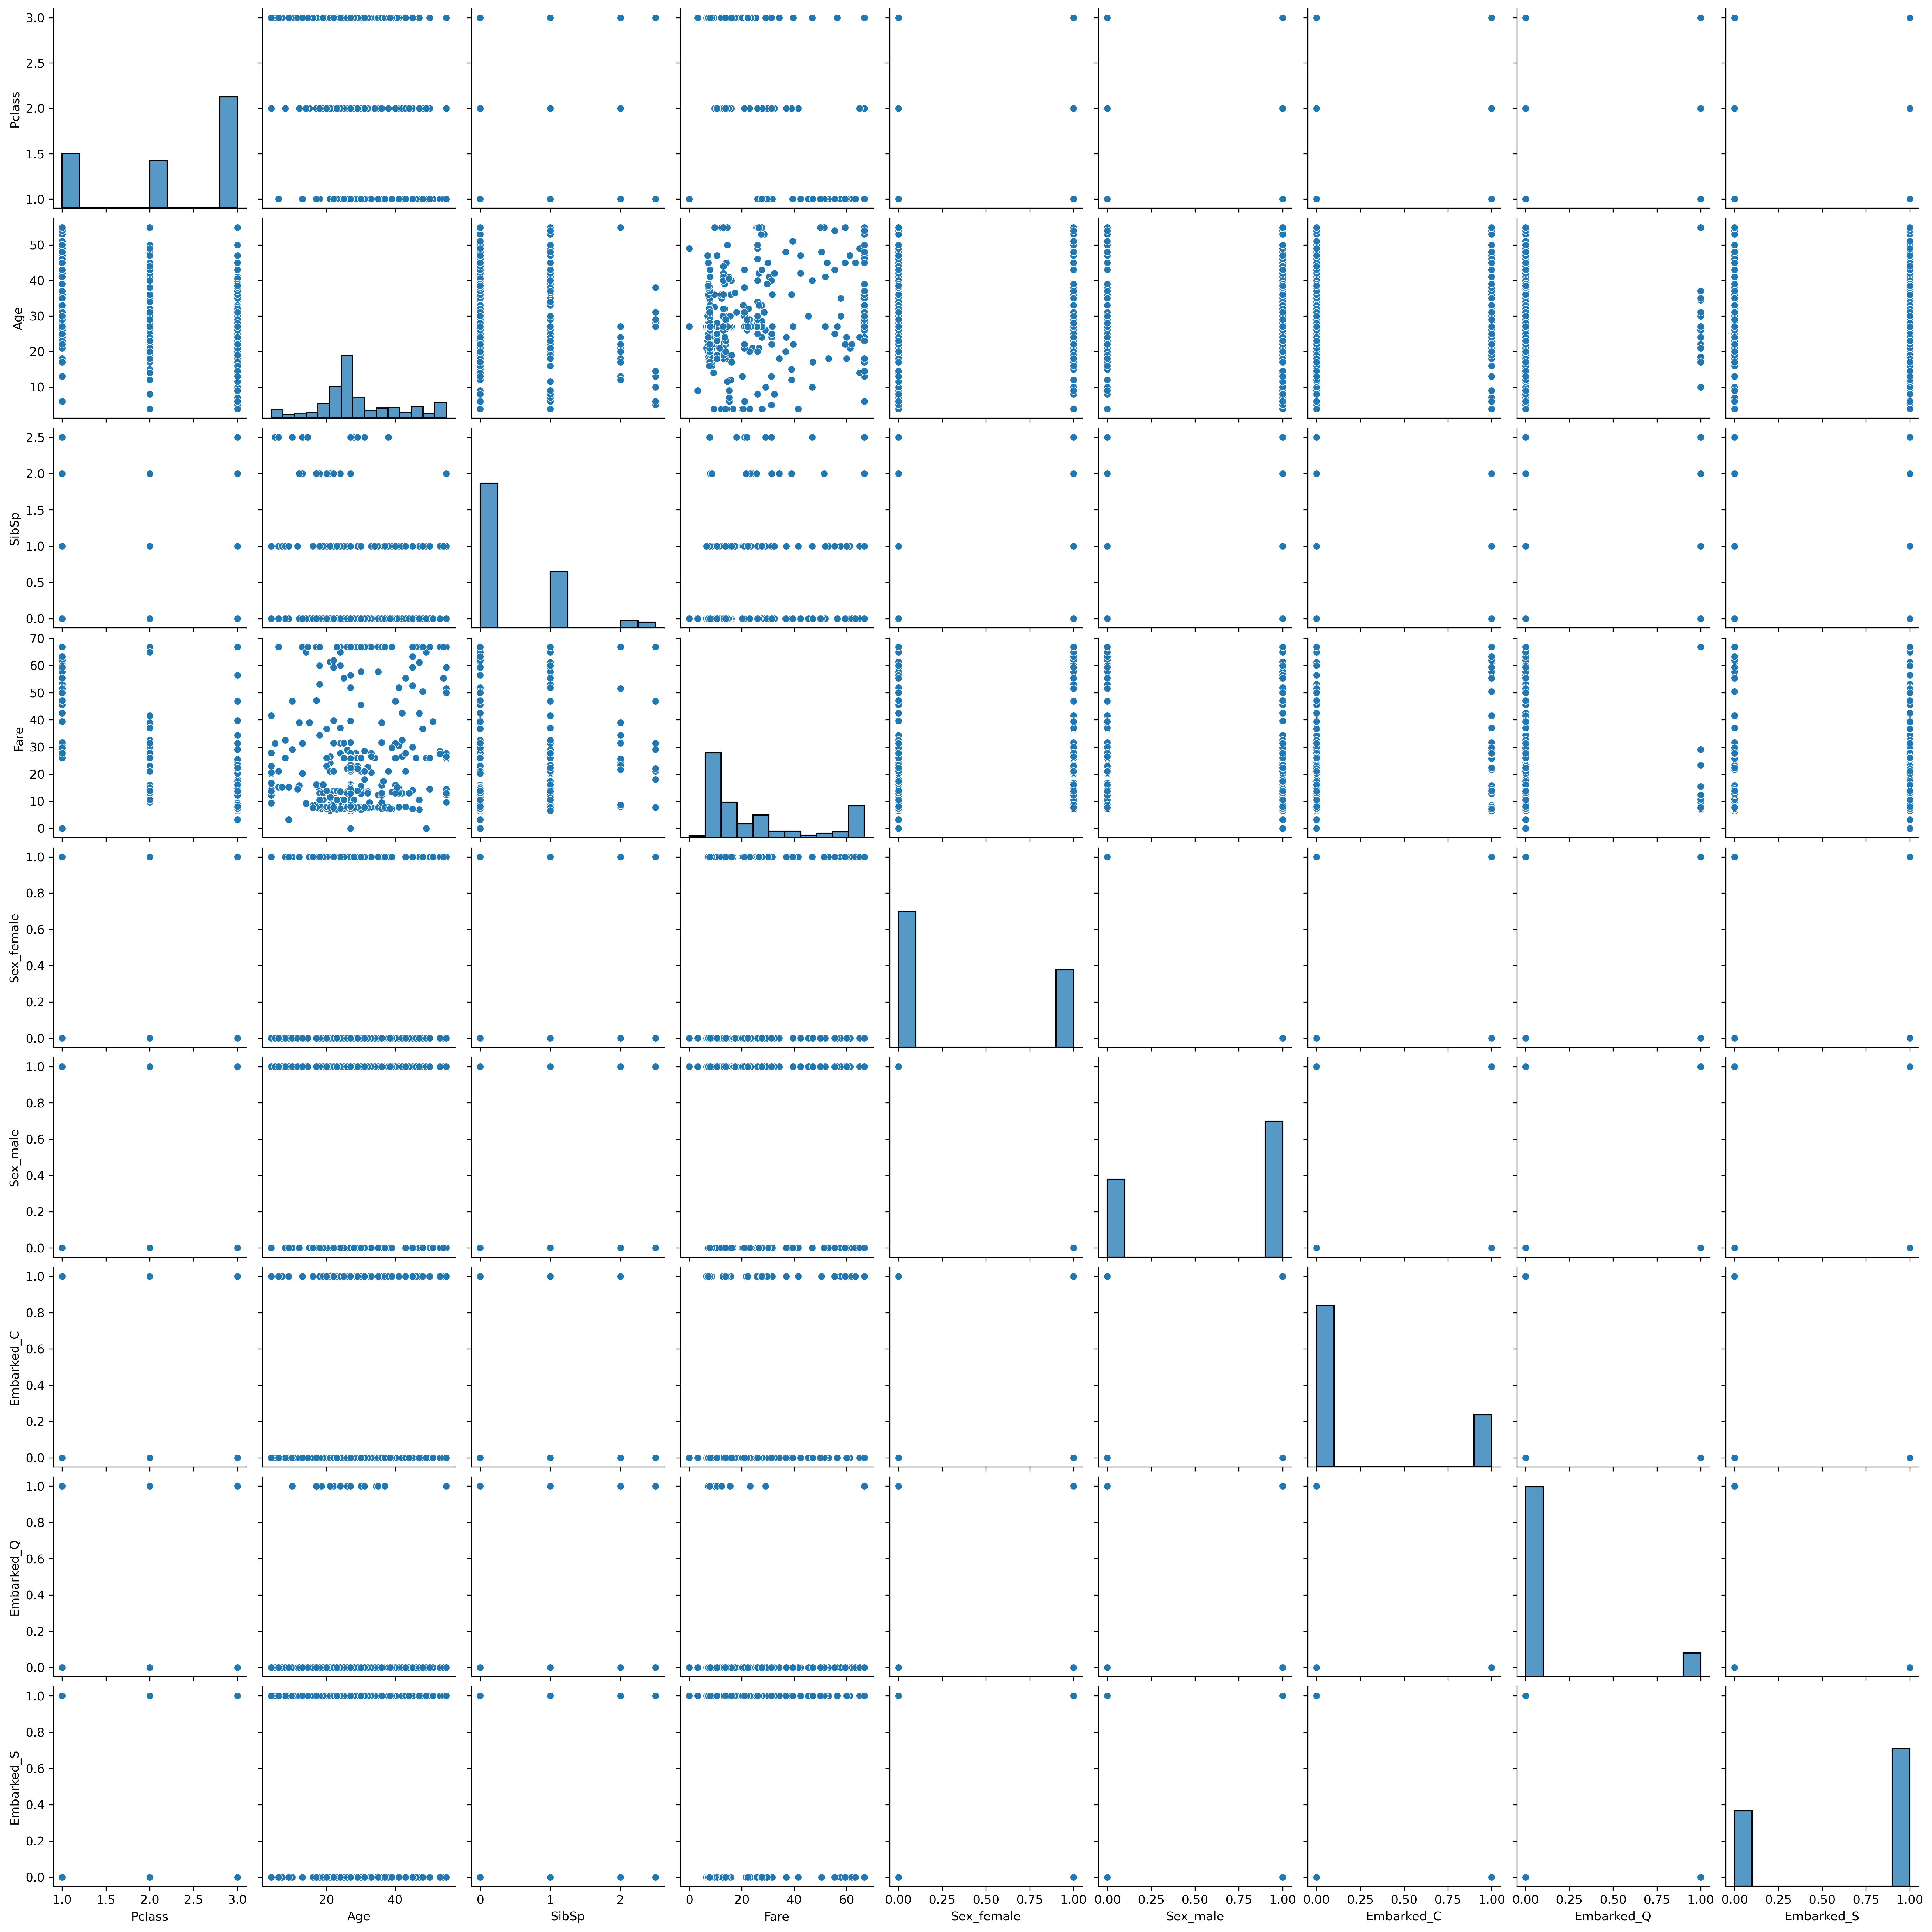

In [95]:
sns.pairplot(titanic_test_data)

In [96]:
#Correlation coefficient
import warnings
warnings.filterwarnings('ignore')
titanic_train_data.corr(numeric_only=True)

Survived    Pclass       Age     SibSp      Fare  Sex_female  \
Survived    1.000000 -0.338481 -0.061956 -0.035322  0.257307    0.543351   
Pclass     -0.338481  1.000000 -0.344489  0.083081 -0.549500   -0.131900   
Age        -0.061956 -0.344489  1.000000 -0.233396  0.099571   -0.079306   
SibSp      -0.035322  0.083081 -0.233396  1.000000  0.159651    0.114631   
Fare        0.257307 -0.549500  0.099571  0.159651  1.000000    0.182333   
Sex_female  0.543351 -0.131900 -0.079306  0.114631  0.182333    1.000000   
Sex_male   -0.543351  0.131900  0.079306 -0.114631 -0.182333   -1.000000   
Embarked_C  0.168240 -0.243292  0.029167 -0.059528  0.269335    0.082853   
Embarked_Q  0.003650  0.221009 -0.041675 -0.026354 -0.117216    0.074115   
Embarked_S -0.149683  0.074053  0.000674  0.068734 -0.162184   -0.119224   

            Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived   -0.543351    0.168240    0.003650   -0.149683  
Pclass      0.131900   -0.243292    0.221009    0.074053  
Age         0.079306    0.029167   -0.041675    0.000674  
SibSp      -0.114631   -0.059528   -0.026354    0.068734  
Fare       -0.182333    0.269335   -0.117216   -0.162184  
Sex_female -1.000000    0.082853    0.074115   -0.119224  
Sex_male    1.000000   -0.082853   -0.074115    0.119224  
Embarked_C -0.082853    1.000000   -0.148258   -0.782742  
Embarked_Q -0.074115   -0.148258    1.000000   -0.499421  
Embarked_S  0.119224   -0.782742   -0.499421    1.000000

In [97]:
import warnings
warnings.filterwarnings('ignore')
titanic_test_data.corr(numeric_only=True)

Pclass       Age     SibSp      Fare  Sex_female  Sex_male  \
Pclass      1.000000 -0.470951 -0.064610 -0.748755   -0.108615  0.108615   
Age        -0.470951  1.000000 -0.043117  0.350319    0.002168 -0.002168   
SibSp      -0.064610 -0.043117  1.000000  0.331912    0.123638 -0.123638   
Fare       -0.748755  0.350319  0.331912  1.000000    0.204543 -0.204543   
Sex_female -0.108615  0.002168  0.123638  0.204543    1.000000 -1.000000   
Sex_male    0.108615 -0.002168 -0.123638 -0.204543   -1.000000  1.000000   
Embarked_C -0.318543  0.171541  0.022891  0.319912    0.033684 -0.033684   
Embarked_Q  0.252608 -0.045909 -0.128711 -0.235730    0.115574 -0.115574   
Embarked_S  0.120783 -0.124021  0.063669 -0.133058   -0.105883  0.105883   

            Embarked_C  Embarked_Q  Embarked_S  
Pclass       -0.318543    0.252608    0.120783  
Age           0.171541   -0.045909   -0.124021  
SibSp         0.022891   -0.128711    0.063669  
Fare          0.319912   -0.235730   -0.133058  
Sex_female    0.033684    0.115574   -0.105883  
Sex_male     -0.033684   -0.115574    0.105883  
Embarked_C    1.000000   -0.199786   -0.767375  
Embarked_Q   -0.199786    1.000000   -0.474962  
Embarked_S   -0.767375   -0.474962    1.000000

<Axes: >

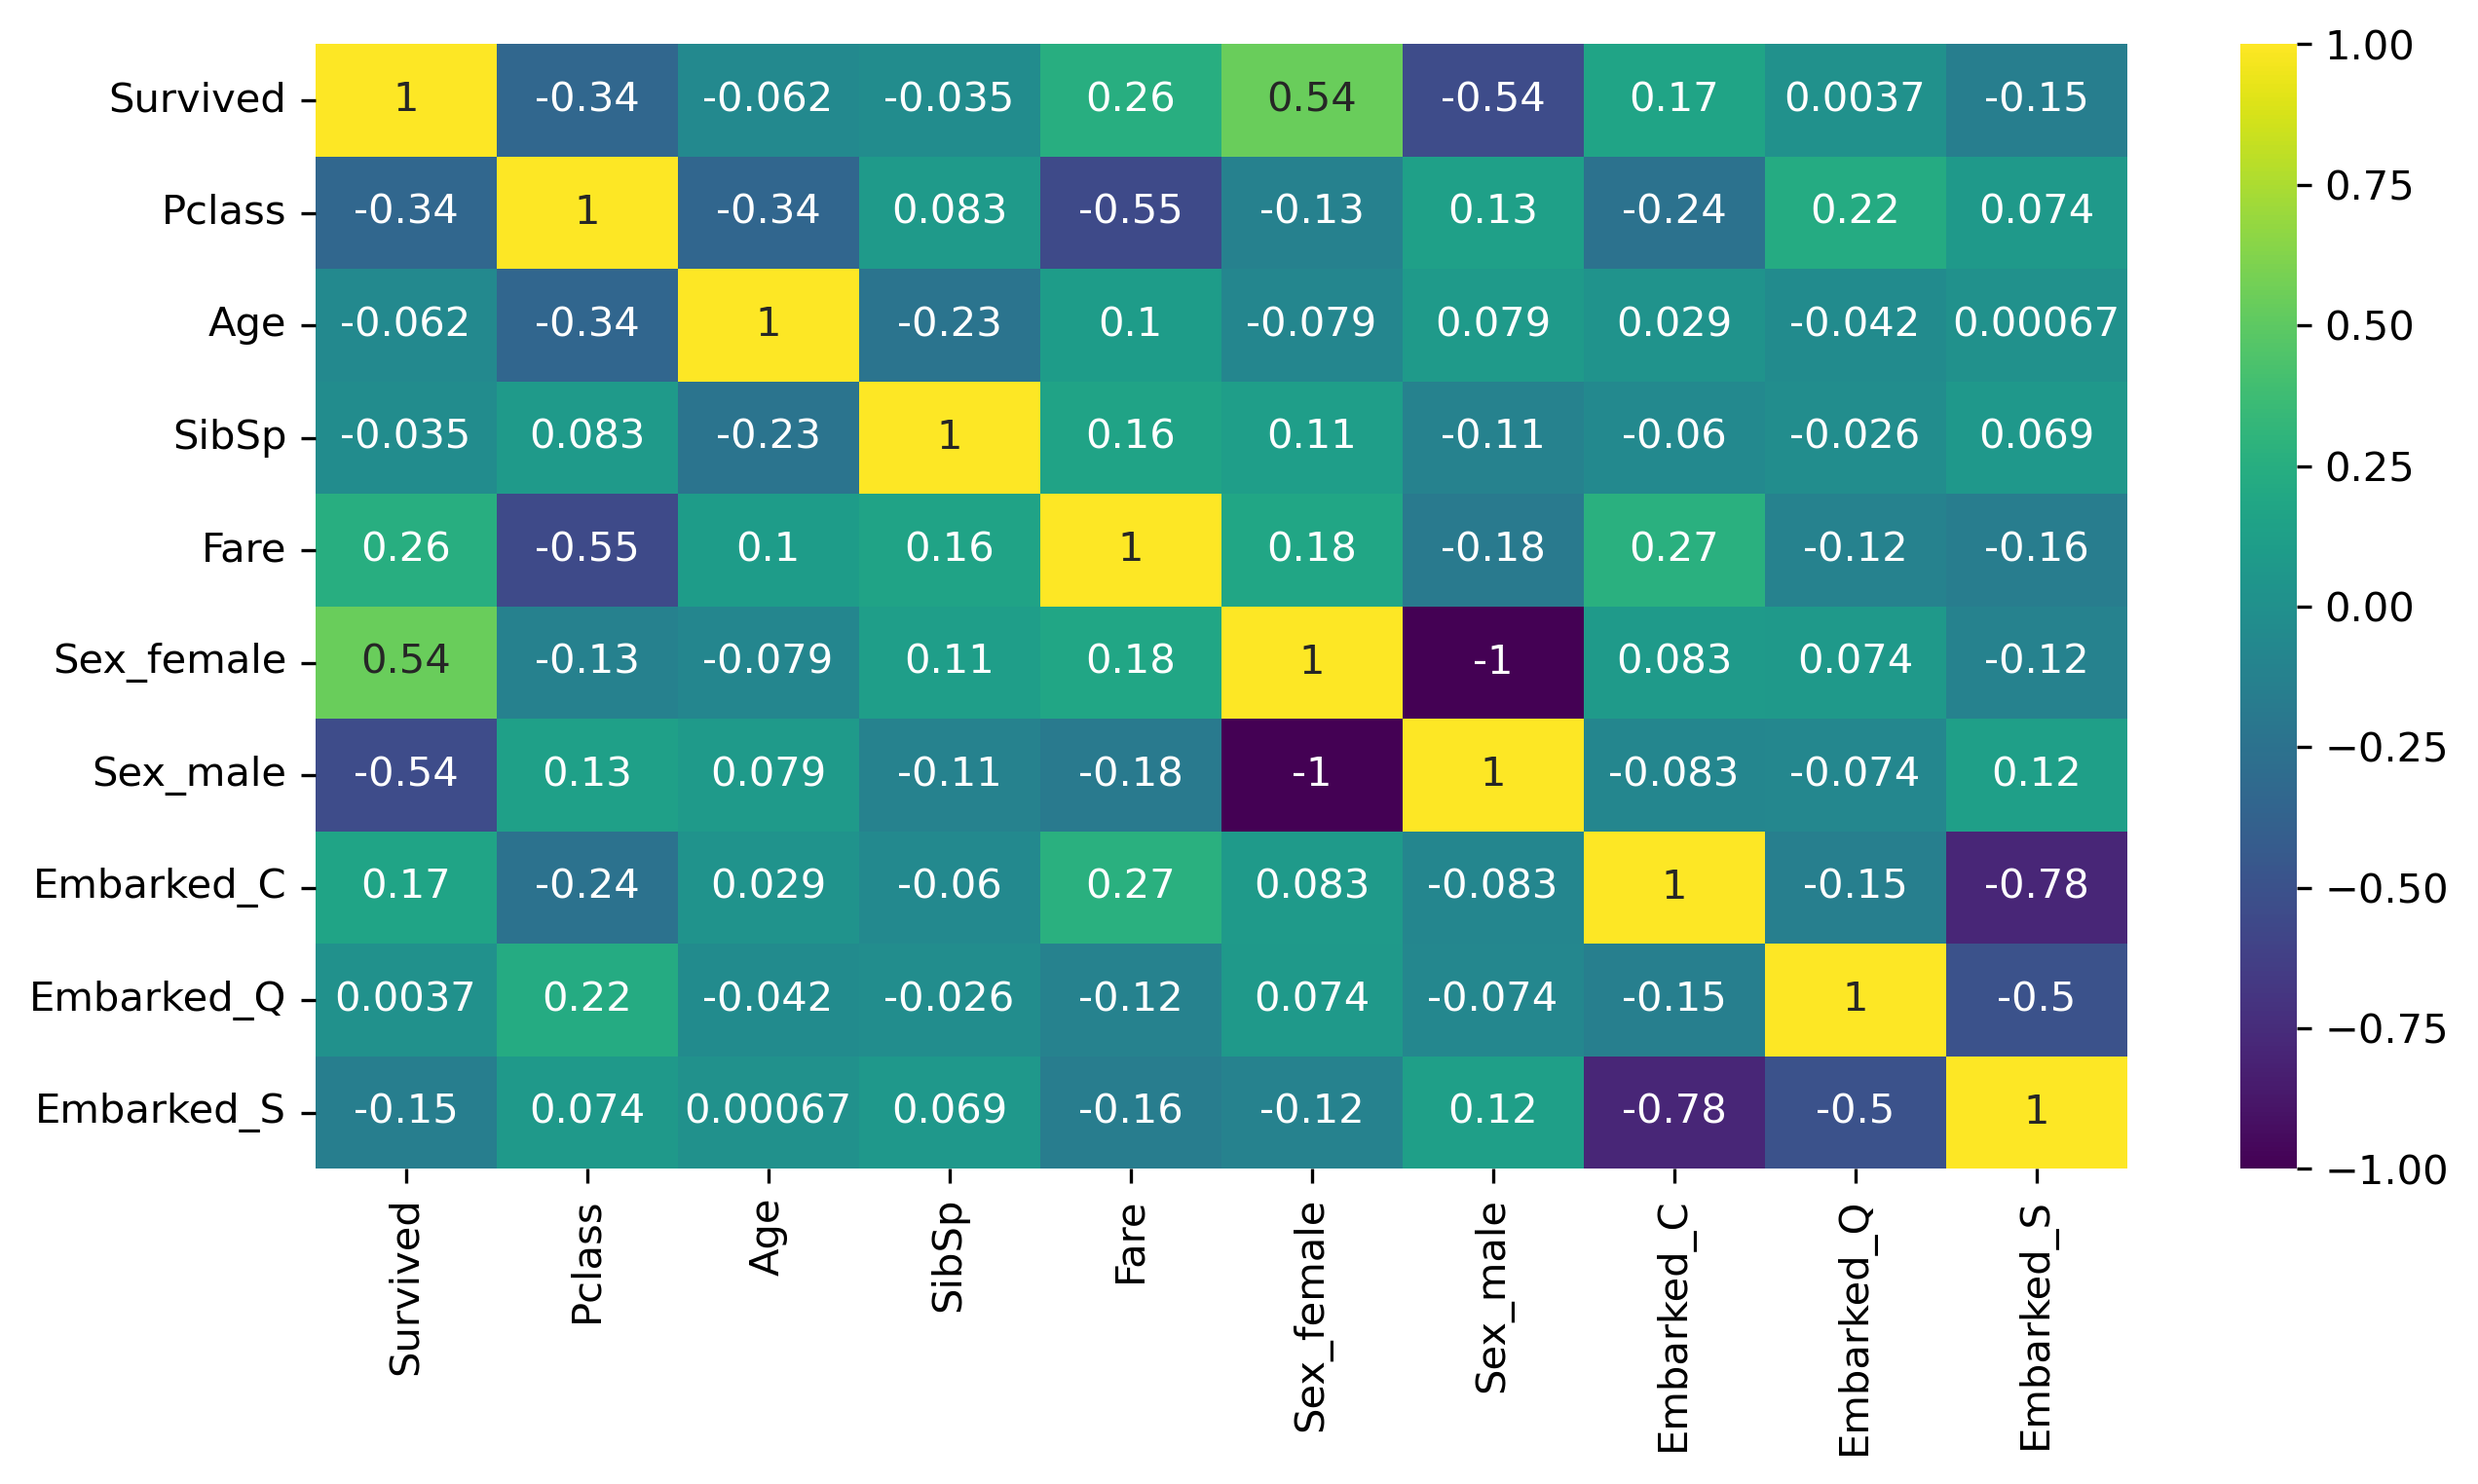

In [98]:
sns.heatmap(titanic_train_data.corr(numeric_only=True), annot=True, cmap='viridis')

<Axes: >

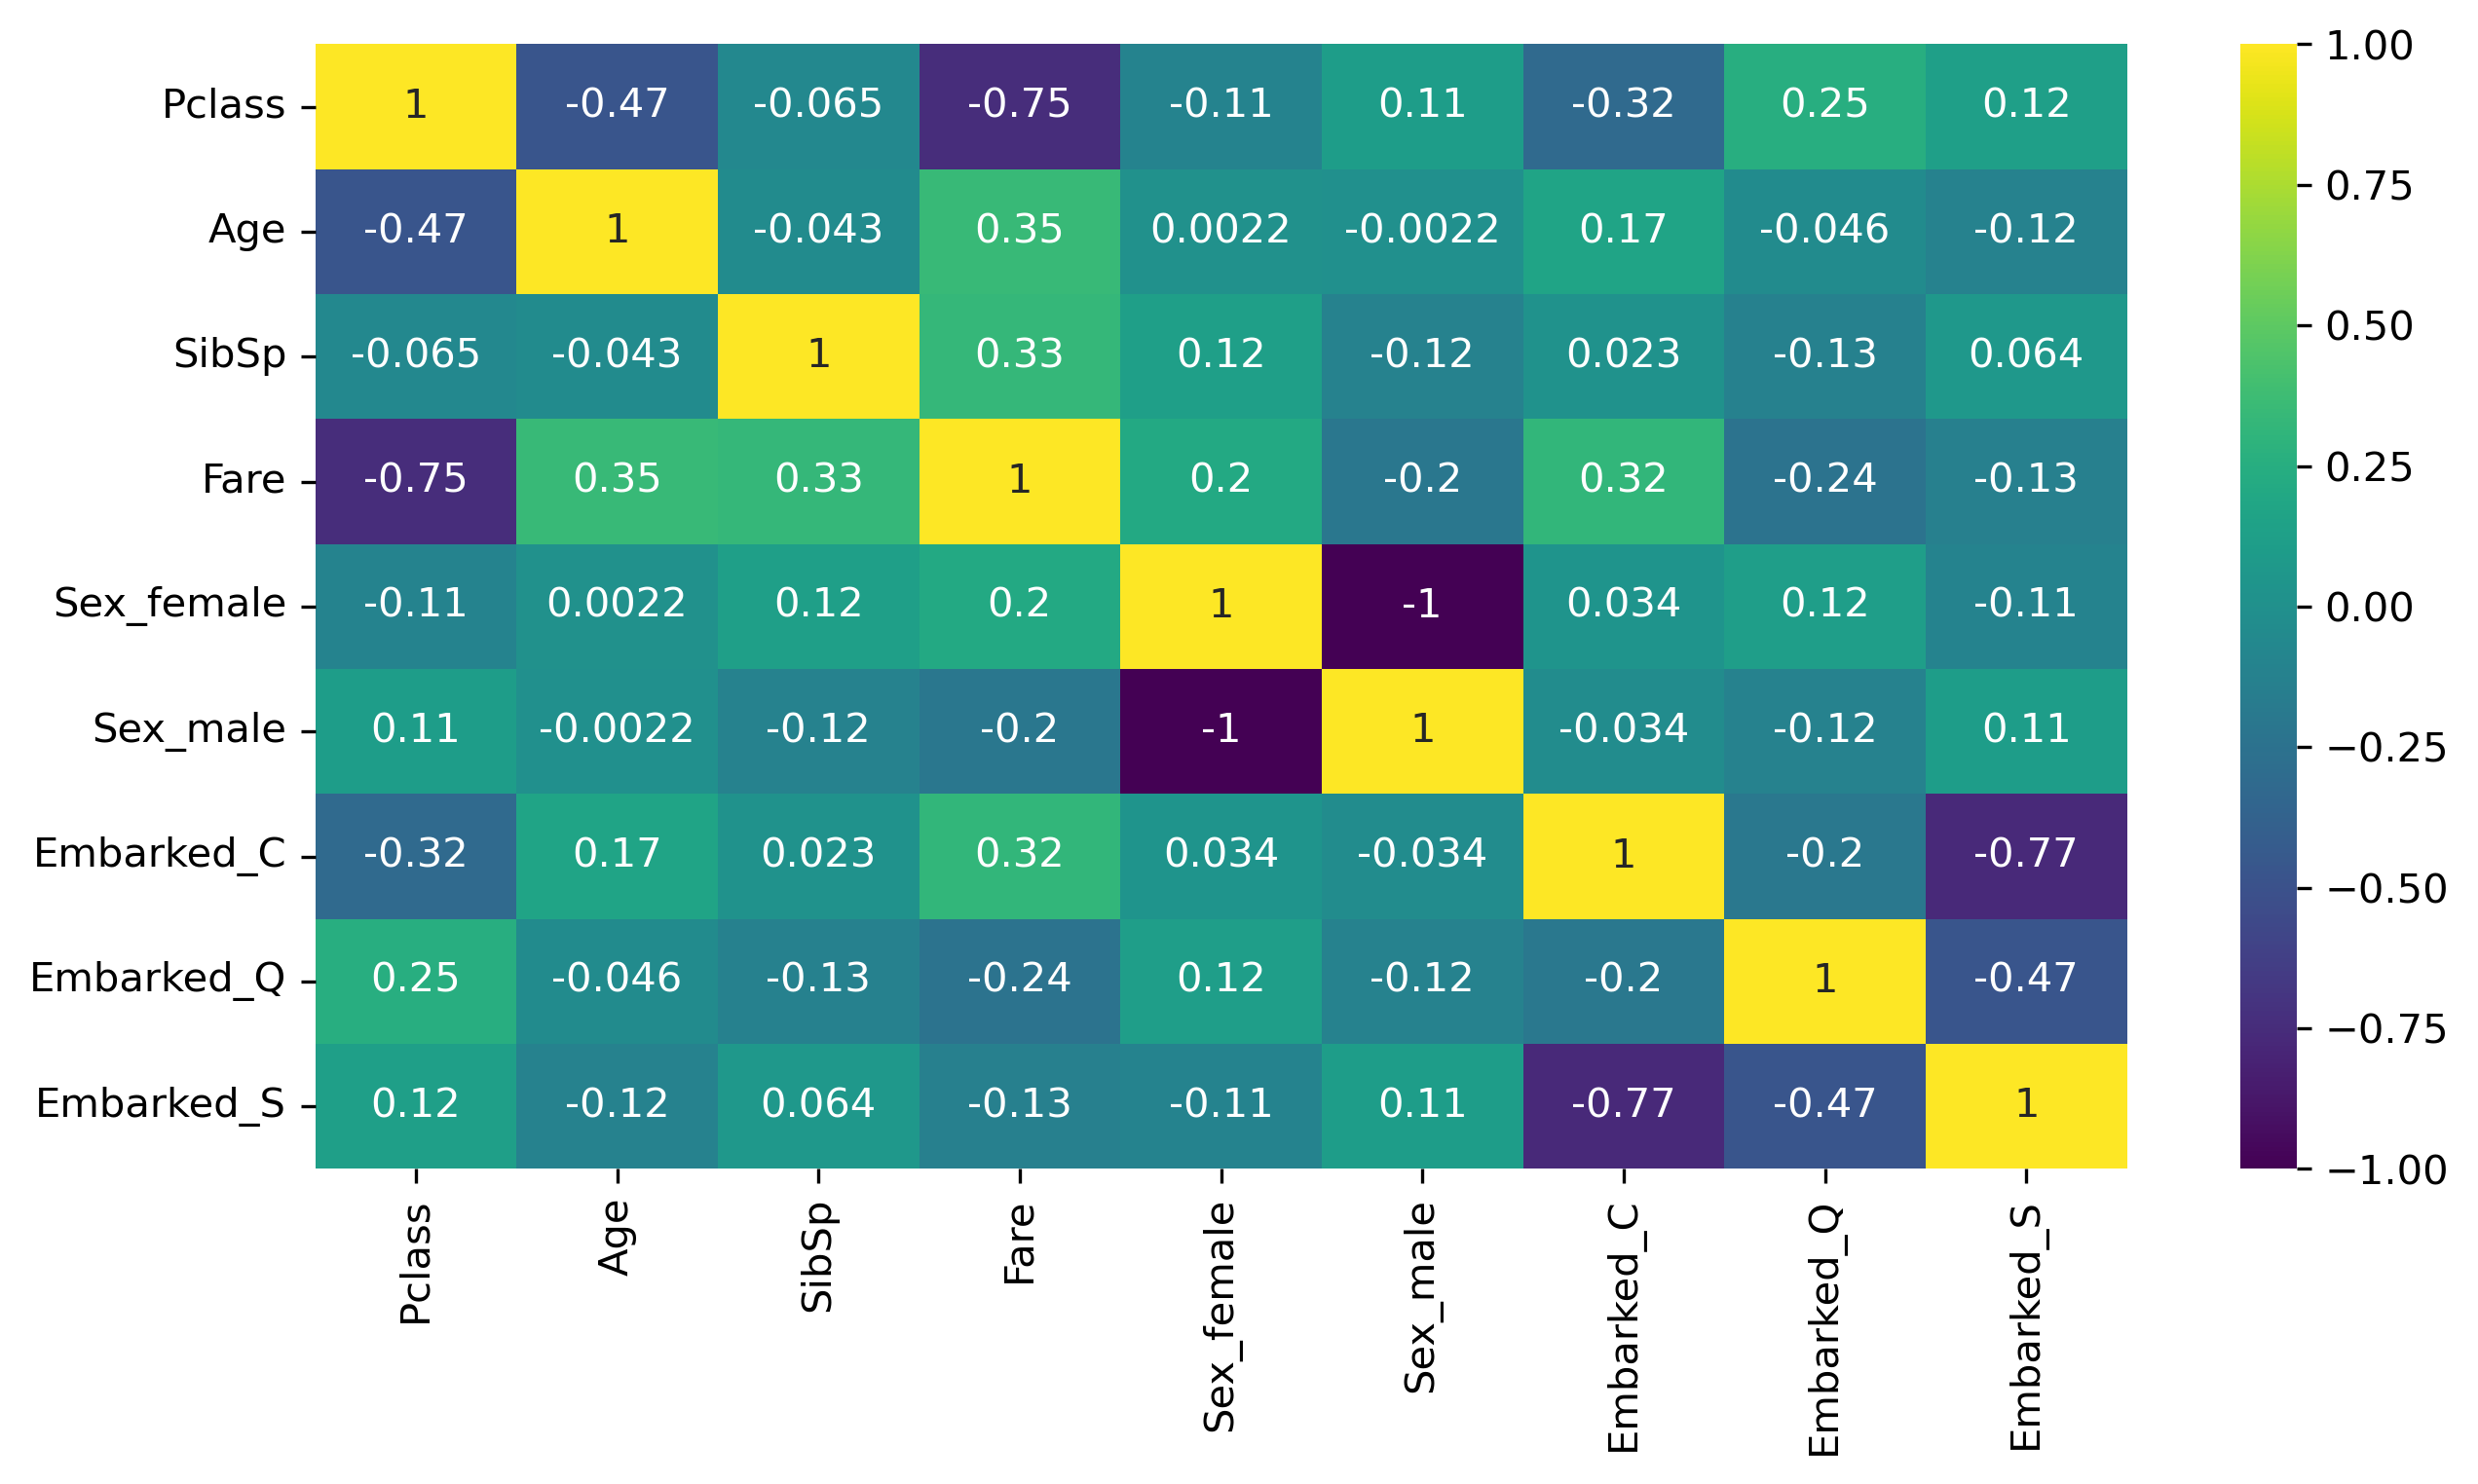

In [99]:
sns.heatmap(titanic_test_data.corr(numeric_only=True), annot=True, cmap='viridis')

In [100]:
titanic_train_data

Survived  Pclass   Age  SibSp     Fare  Sex_female  Sex_male  Embarked_C  \
0           0       3  22.0      1   7.2500       False      True       False   
1           1       1  38.0      1  71.2833        True     False        True   
2           1       3  26.0      0   7.9250        True     False       False   
3           1       1  35.0      1  53.1000        True     False       False   
4           0       3  35.0      0   8.0500       False      True       False   
..        ...     ...   ...    ...      ...         ...       ...         ...   
886         0       2  27.0      0  13.0000       False      True       False   
887         1       1  19.0      0  30.0000        True     False       False   
888         0       3  27.0      1  23.4500        True     False       False   
889         1       1  26.0      0  30.0000       False      True        True   
890         0       3  32.0      0   7.7500       False      True       False   

     Embarked_Q  Embarked_S  
0         False        True  
1         False       False  
2         False        True  
3         False        True  
4         False        True  
..          ...         ...  
886       False        True  
887       False        True  
888       False        True  
889       False       False  
890        True       False  

[891 rows x 10 columns]

In [101]:
titanic_test_data

Pclass     Age  SibSp       Fare  Sex_female  Sex_male  Embarked_C  \
0       3.0  34.500    0.0   7.829200       False      True       False   
1       3.0  47.000    1.0   7.000000        True     False       False   
2       2.0  54.875    0.0   9.687500       False      True       False   
3       3.0  27.000    0.0   8.662500       False      True       False   
4       3.0  22.000    1.0  12.287500        True     False       False   
..      ...     ...    ...        ...         ...       ...         ...   
413     3.0  27.000    0.0   8.050000       False      True       False   
414     1.0  39.000    0.0  66.835988        True     False        True   
415     3.0  38.500    0.0   7.250000       False      True       False   
416     3.0  27.000    0.0   8.050000       False      True       False   
417     3.0  27.000    1.0  22.358300       False      True        True   

     Embarked_Q  Embarked_S  
0          True       False  
1         False        True  
2          True       False  
3         False        True  
4         False        True  
..          ...         ...  
413       False        True  
414       False       False  
415       False        True  
416       False        True  
417       False       False  

[418 rows x 9 columns]

In [123]:
#Data preprocessing
##Encoding using pandas dummy function.
titanic_train_data=pd.get_dummies(data=titanic_train_data)
#titanic_train_data=pd.get_dummies(data=titanic_train_data, columns= ['Sex','Embarked'])
titanic_train_data

Survived  Pclass   Age  SibSp     Fare  Sex_female  Sex_male  Embarked_C  \
0           0       3  22.0      1   7.2500       False      True       False   
1           1       1  38.0      1  71.2833        True     False        True   
2           1       3  26.0      0   7.9250        True     False       False   
3           1       1  35.0      1  53.1000        True     False       False   
4           0       3  35.0      0   8.0500       False      True       False   
..        ...     ...   ...    ...      ...         ...       ...         ...   
886         0       2  27.0      0  13.0000       False      True       False   
887         1       1  19.0      0  30.0000        True     False       False   
888         0       3  27.0      1  23.4500        True     False       False   
889         1       1  26.0      0  30.0000       False      True        True   
890         0       3  32.0      0   7.7500       False      True       False   

     Embarked_Q  Embarked_S  
0         False        True  
1         False       False  
2         False        True  
3         False        True  
4         False        True  
..          ...         ...  
886       False        True  
887       False        True  
888       False        True  
889       False       False  
890        True       False  

[891 rows x 10 columns]

In [124]:
titanic_test_data=pd.get_dummies(data=titanic_test_data)
titanic_test_data=pd.get_dummies(data=titanic_test_data, columns= ['Sex','Embarked'])
titanic_test_data

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [104]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [105]:
titanic_test_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [106]:
#3. Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.
#Define x and y
titanic_train_data.head(4)

Survived  Pclass   Age  SibSp     Fare  Sex_female  Sex_male  Embarked_C  \
0         0       3  22.0      1   7.2500       False      True       False   
1         1       1  38.0      1  71.2833        True     False        True   
2         1       3  26.0      0   7.9250        True     False       False   
3         1       1  35.0      1  53.1000        True     False       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True

In [107]:
x =titanic_train_data .iloc[:,1:]
x

Pclass   Age  SibSp     Fare  Sex_female  Sex_male  Embarked_C  \
0         3  22.0      1   7.2500       False      True       False   
1         1  38.0      1  71.2833        True     False        True   
2         3  26.0      0   7.9250        True     False       False   
3         1  35.0      1  53.1000        True     False       False   
4         3  35.0      0   8.0500       False      True       False   
..      ...   ...    ...      ...         ...       ...         ...   
886       2  27.0      0  13.0000       False      True       False   
887       1  19.0      0  30.0000        True     False       False   
888       3  27.0      1  23.4500        True     False       False   
889       1  26.0      0  30.0000       False      True        True   
890       3  32.0      0   7.7500       False      True       False   

     Embarked_Q  Embarked_S  
0         False        True  
1         False       False  
2         False        True  
3         False        True  
4         False        True  
..          ...         ...  
886       False        True  
887       False        True  
888       False        True  
889       False       False  
890        True       False  

[891 rows x 9 columns]

In [108]:
y = titanic_train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [109]:
#Split the data.
from sklearn.model_selection import train_test_split
train_test_split(x,y,train_size=0.8)

[     Pclass   Age  SibSp     Fare  Sex_female  Sex_male  Embarked_C  \
 611       3  27.0      0    7.050       False      True       False   
 675       3  18.0      0    7.775       False      True       False   
 354       3  27.0      0    7.225       False      True        True   
 673       2  31.0      0   13.000       False      True       False   
 657       3  32.0      1   15.500        True     False       False   
 ..      ...   ...    ...      ...         ...       ...         ...   
 861       2  21.0      1   11.500       False      True       False   
 304       3  27.0      0    8.050       False      True       False   
 93        3  26.0      1   20.575       False      True       False   
 492       1  55.0      0   30.500       False      True       False   
 377       1  27.0      0  211.500       False      True        True   
 
      Embarked_Q  Embarked_S  
 611       False        True  
 675       False        True  
 354       False       False  
 673      

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lg = LogisticRegression() 
lg.fit(xtrain,ytrain) 

LogisticRegression()

In [113]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [114]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [115]:
len(ypred)

179

In [116]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score,roc_curve

In [117]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[88, 17],
       [20, 54]], dtype=int64)

<Axes: >

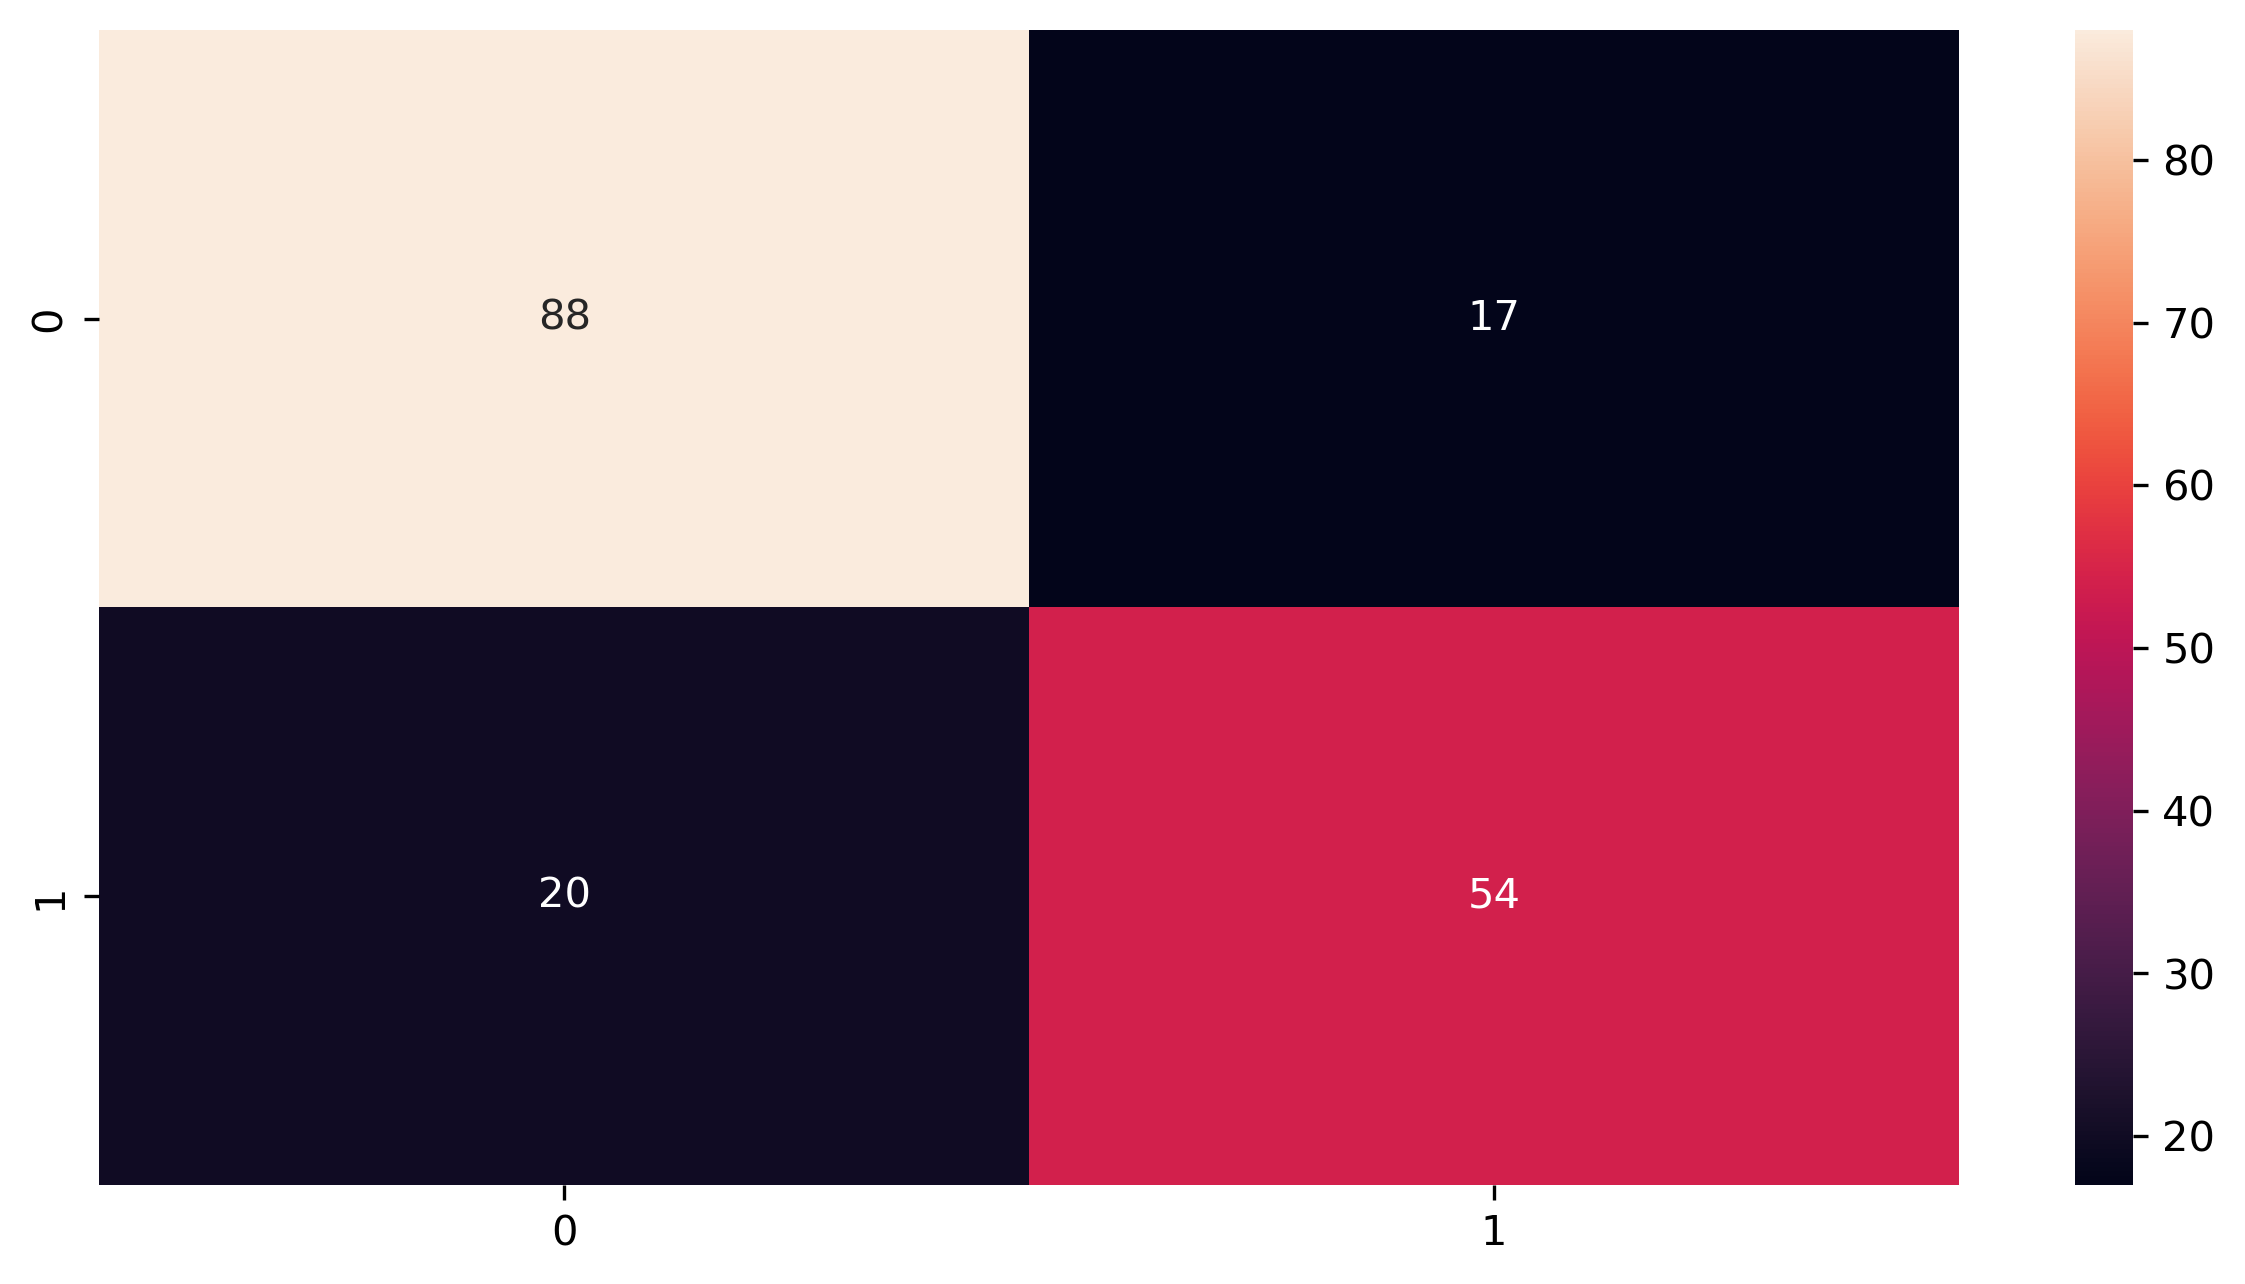

In [118]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt = 'g')

In [119]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [120]:
roc_auc=roc_auc_score(ytest,ypred)

In [121]:
print(f'ROC AUC :{roc_auc}')

ROC AUC :0.783912483912484


In [122]:
#Interview Questions (from the document)
#1. Difference between precision and recall: 
#Precision is the ratio of true positive predictions to the total predicted positives, while recall is the ratio of true positive predictions 
#to the actual positives.

#2.Importance of cross-validation:
#Cross-validation is a technique used to assess the generalizability of a model. It helps ensure that the model performs 
#well on unseen data and reduces the risk of overfitting